In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_data(file_path):
    t_values = []
    theta_values = []
    omega_values = []

    
    with open(file_path, 'r') as file:
        for line in file:
            
            columns = line.strip().split('\t')

           
            t_values.append(float(columns[0]))
            theta_values.append(float(columns[1]))
            omega_values.append(float(columns[2]))

  
    t_array = np.array(t_values)
    theta_array = np.array(theta_values)
    omega_array = np.array(omega_values)

    return t_array, theta_array, omega_array

### Mathematical pendulum

The mathematical pendulum is a body of mass m which is suspended on a thread of negligible mass and length l, on which only the force of gravity acts as a free force. When the pendulum,  is displaced from its equilibrium position, it performs an undamped periodic motion. The approximation is correct (less than 1% relative error) if the deviations are less than 9.9 degrees.

source: https://hu.wikipedia.org/wiki/Matematikai_inga

In [3]:
t_math1,theta_math1,omega_math1 = read_data('data1/euler.data')
t_math2,theta_math2,omega_math2 = read_data('data1/euler_cromer.data')
t_math3,theta_math3,omega_math3 = read_data('data1/runge_kutta.data')
t_math4,theta_math4,omega_math4 = read_data('data1/adaptive_rk4.data')
t_math4_test,theta_math4_test,omega_math4_test = read_data('data1/adaptive_rk4_test.data')

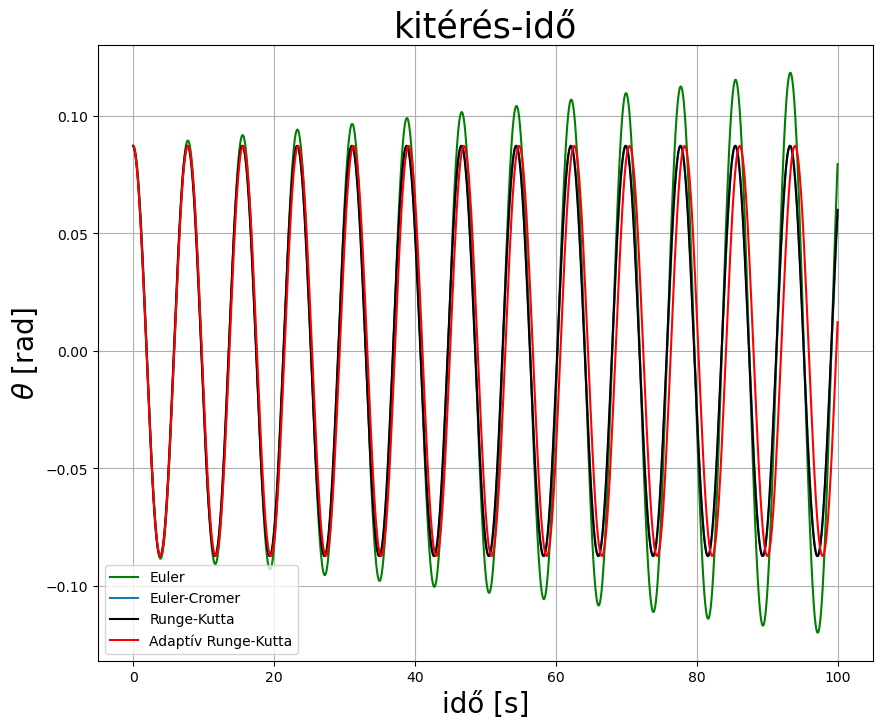

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(t_math1,theta_math1, label = "Euler", color = "green")
plt.plot(t_math2,theta_math2, label = "Euler-Cromer")
plt.plot(t_math3,theta_math3, label = "Runge-Kutta", color = "black")
plt.plot(t_math4,theta_math4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("kitérés-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\theta$ [rad]", size = 20)
plt.grid(True)
# angle - time diagramm

(array([3465, 3466, 3467, ..., 9997, 9998, 9999]),)


Text(0.5, 0, 'idő [s]')

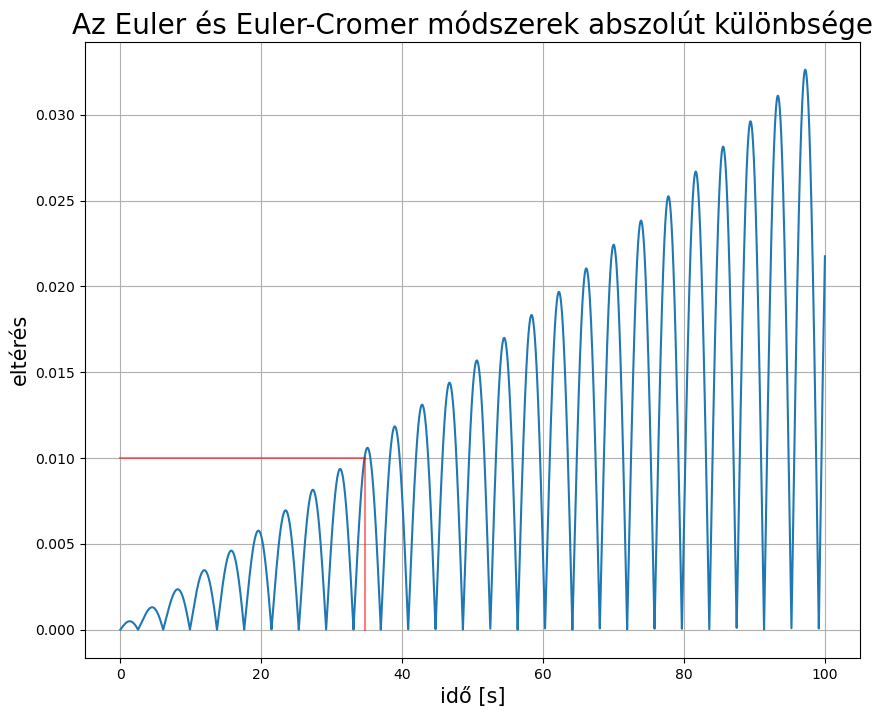

In [ ]:
plt.figure(figsize= (10,8))
diff = theta_math1 -theta_math2
print(np.where(abs(diff) > 0.01))
timediff = np.linspace(0,100,10000)
x = [0,timediff[3465]]
y = [0.01,0.01]
x2 = [timediff[3465],timediff[3465]]
y2 = [0,0.01]
plt.plot(timediff,abs(diff))
plt.plot(x,y, color = "red", alpha = 0.5)
plt.plot(x2,y2, color = "red", alpha = 0.5)
plt.grid(True)
plt.title("Az Euler és Euler-Cromer módszerek abszolút különbsége", size = 20)
plt.ylabel("eltérés", size = 15)
plt.xlabel("idő [s]", size = 15)

#The difference between using the Euler and the Euler - Cromer method for simulation

In [ ]:
timediff[3465] #timestap of 1% error

34.65346534653465

(0.0, 40.0)

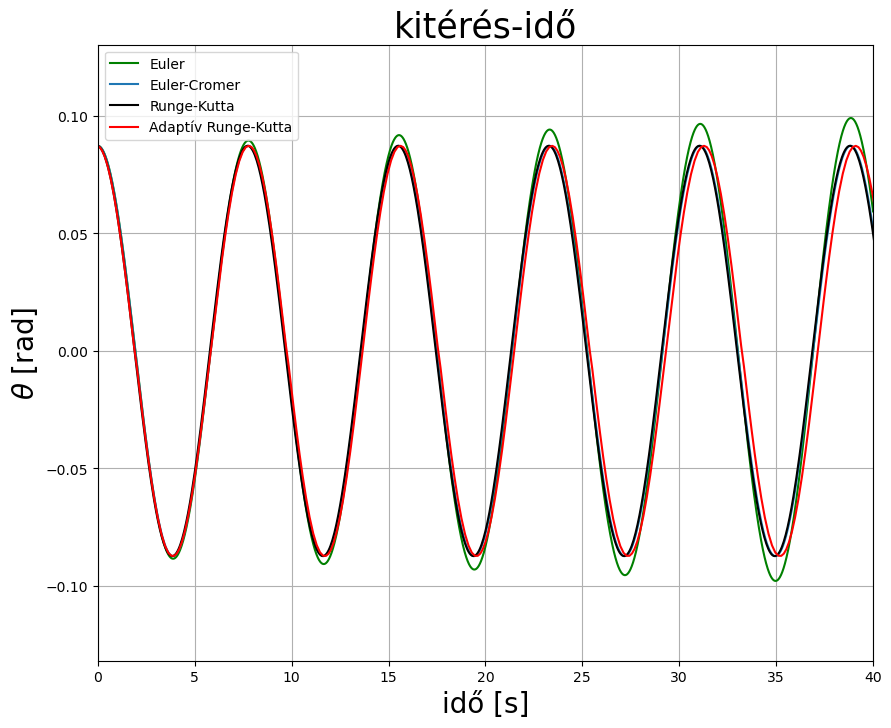

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(t_math1,theta_math1, label = "Euler", color = "green")
plt.plot(t_math2,theta_math2, label = "Euler-Cromer")
plt.plot(t_math3,theta_math3, label = "Runge-Kutta", color = "black")
plt.plot(t_math4,theta_math4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("kitérés-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\theta$ [rad]", size = 20)
plt.grid(True)
plt.xlim(0,40)
#the comparison of simulations.

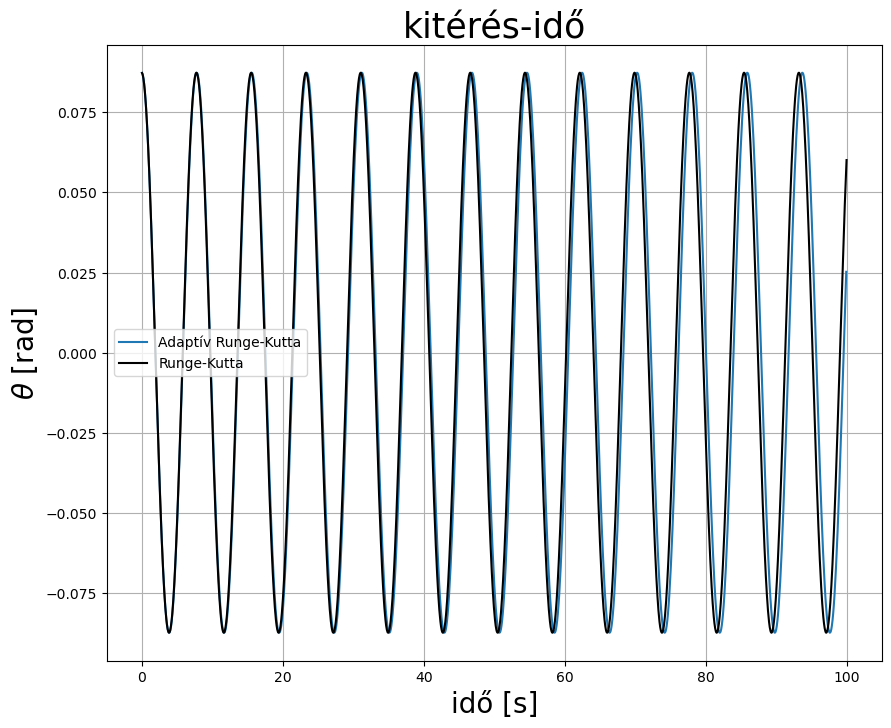

In [8]:
plt.figure(figsize= (10,8))
plt.plot(t_math4_test,theta_math4_test, label = "Adaptív Runge-Kutta")
plt.plot(t_math3,theta_math3, label = "Runge-Kutta", color = "black")
#plt.plot(t_math4,theta_math4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("kitérés-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\theta$ [rad]", size = 20)
plt.grid(True)

Text(0.5, 0, 'idő [s]')

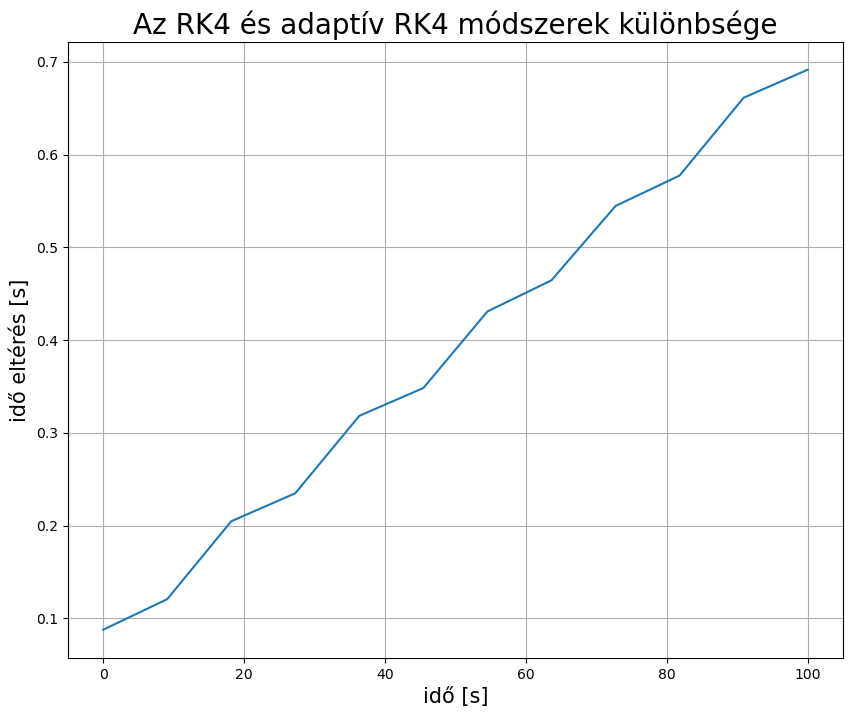

In [ ]:
from scipy.signal import find_peaks
plt.figure(figsize= (10,8))
peak1 = find_peaks(theta_math4)
peak2 = find_peaks(theta_math3)
diff = t_math4[peak1[0]] -t_math3[peak2[0]]
timediff = np.linspace(0,100,12)
#x = [0,timediff[3465]]
#y = [0.01,0.01]
#x2 = [timediff[3465],timediff[3465]]
#y2 = [0,0.01]
plt.plot(timediff,abs(diff))
#plt.plot(x,y, color = "red", alpha = 0.5)
#plt.plot(x2,y2, color = "red", alpha = 0.5)
plt.grid(True)
plt.title("Az RK4 és adaptív RK4 módszerek különbsége", size = 20)
plt.ylabel("idő eltérés [s]", size = 15)
plt.xlabel("idő [s]", size = 15)

#Comparison between the Runge - Kutta and the adaptive Runge - Kutta method

(0.0, 40.0)

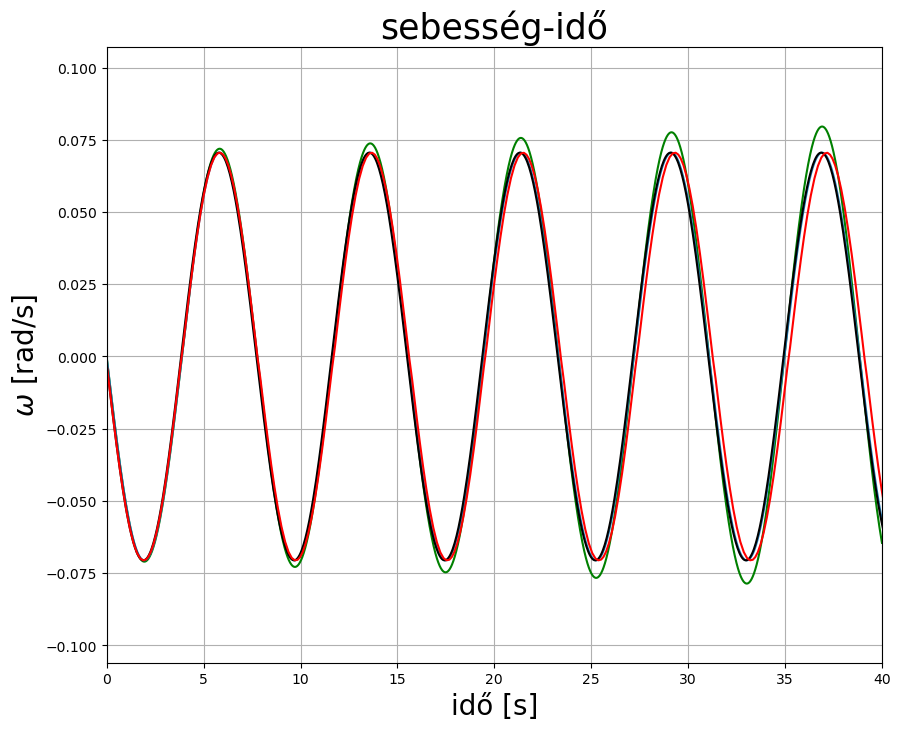

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(t_math1,omega_math1, label = "Euler", color = "green")
plt.plot(t_math2,omega_math2, label = "Euler-Cromer")
plt.plot(t_math3,omega_math3, label = "Runge-Kutta", color = "black")
plt.plot(t_math4,omega_math4, label = "Adaptív Runge-Kutta", color = "red")
plt.title("sebesség-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\omega$ [rad/s]", size = 20)
plt.grid(True)
plt.xlim(0,40)
#time - velocity plot

In [ ]:
def plot_pendulum_motion_circular(theta,lenpen):
    x = np.sin(theta)*lenpen
    y = -np.cos(theta)*lenpen  
    plt.figure(figsize= (10,8))
    plt.plot(x, y, label='pálya', color='b')
    plt.title('Ingamozgás', size = 25)
    plt.xlabel('vizszintes kitérés [m]', size = 15)
    plt.ylabel('függőleges kitérés [m]', size = 15)
    plt.legend(fontsize = 15)
    plt.axis('equal')  
    plt.grid(True)
#the  route of the pendulum

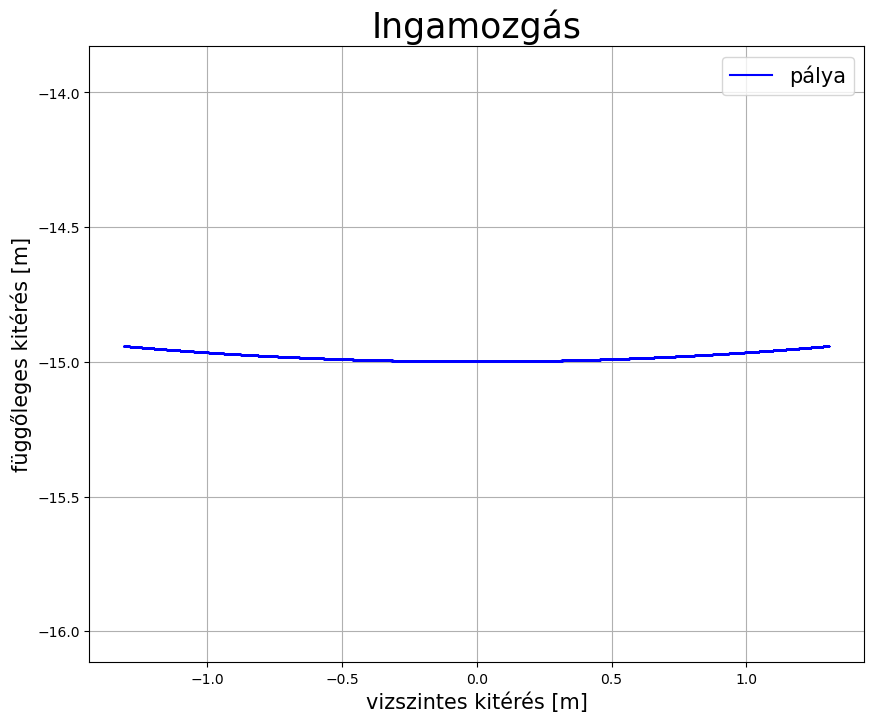

In [12]:
plot_pendulum_motion_circular(theta_math2,15)

In [ ]:
#calculating the energy for every time step
def energy(theta,omega,m,L):
    g = 9.81
    v = omega * L
    E_kin = 0.5 * m * v**2
    h = L * (1-np.cos(theta))
    E_pot = m*g*h
    return E_kin + E_pot

In [14]:
energycorrect = energy(theta_math2,omega_math2,1,15)
energywrong = energy(theta_math1,omega_math1,1,15)

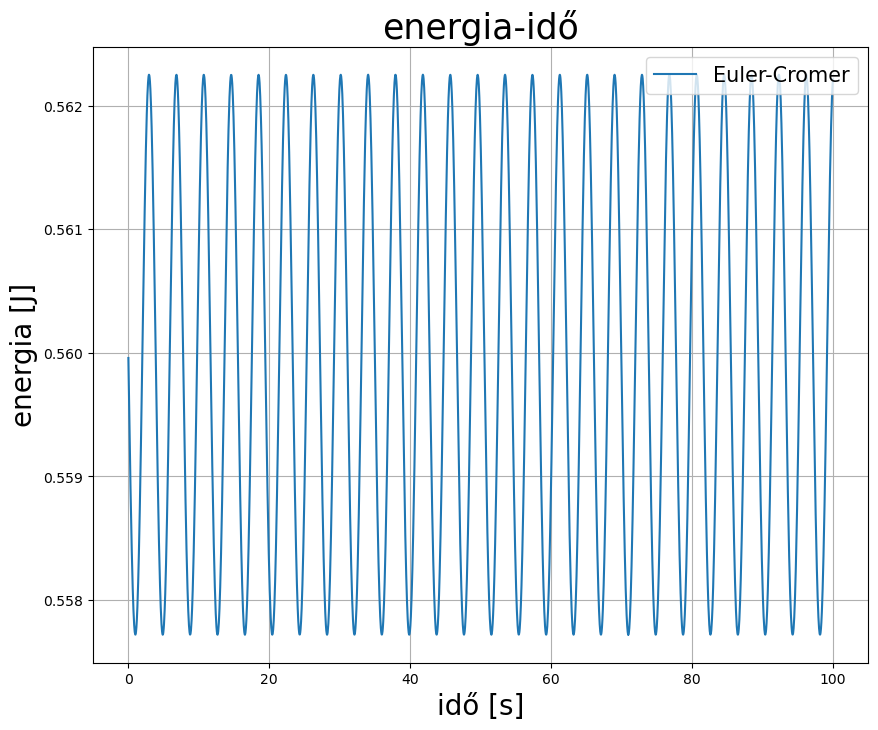

In [ ]:
plt.figure(figsize= (10,8))
#plt.plot(t_math1,energywrong, label = "Euler")
plt.plot(t_math2,energycorrect, label = "Euler-Cromer")
plt.legend(loc = "upper right", fontsize= 15)
plt.title("energia-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel("energia [J]", size = 20)
plt.grid(True)
#energy - time plot

In [16]:
energycorrect = energy(theta_math3,omega_math3,1,15)
energywrong = energy(theta_math4,omega_math4,1,15)

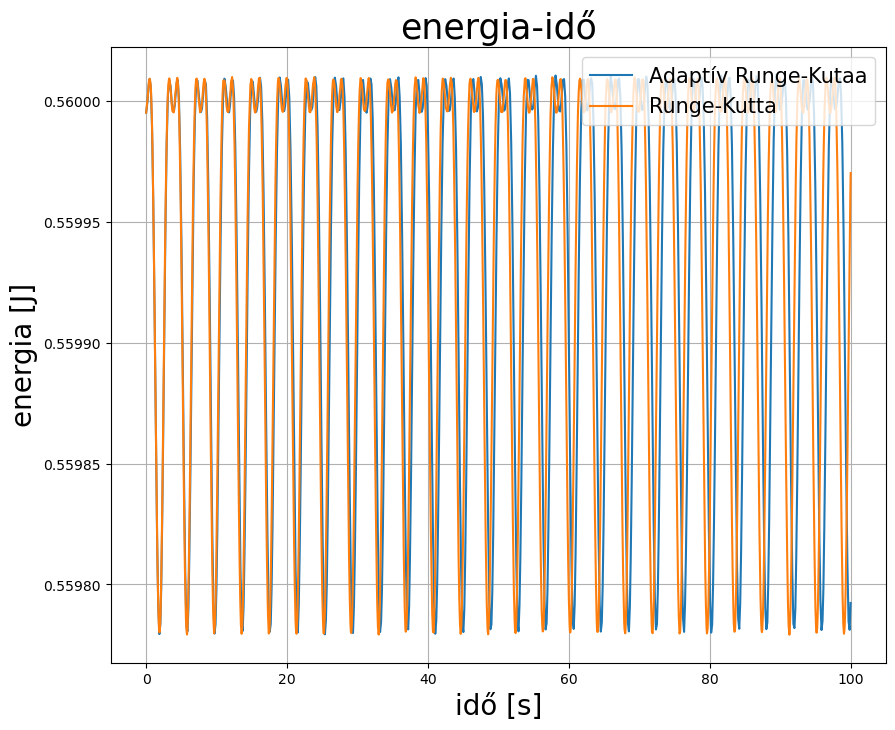

In [ ]:
plt.figure(figsize= (10,8)) 
plt.plot(t_math4,energywrong, label = "Adaptív Runge-Kutaa")
plt.plot(t_math3,energycorrect, label = "Runge-Kutta")
plt.legend(loc = "upper right", fontsize= 15)
plt.title("energia-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel("energia [J]", size = 20)
plt.grid(True)
#energy - time plot using the Runge - Kutta methods.

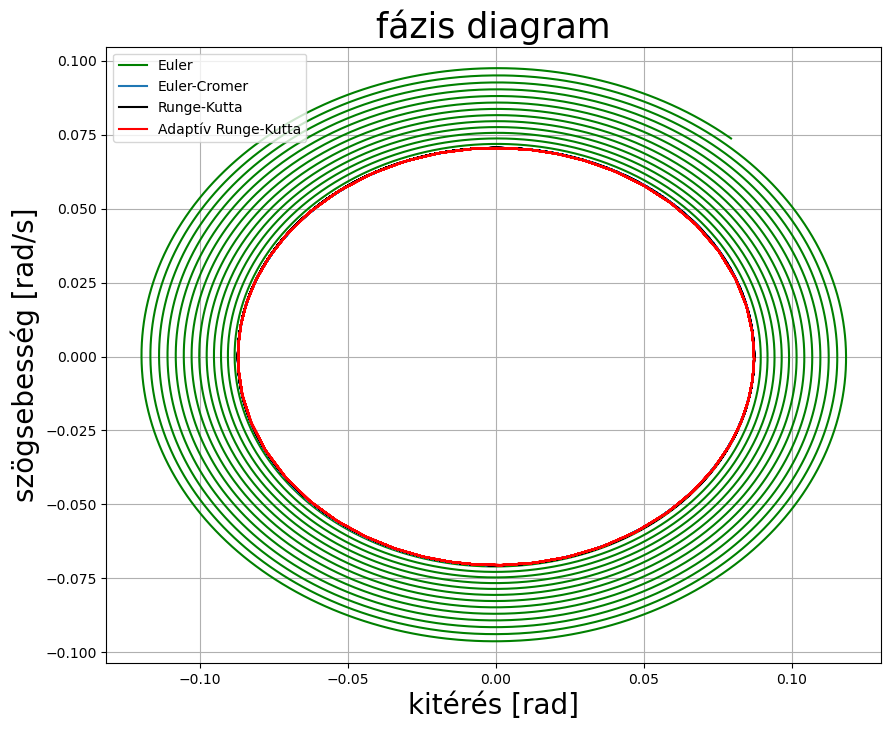

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(theta_math1,omega_math1, label = "Euler", color = "green")
plt.plot(theta_math2,omega_math2, label = "Euler-Cromer")
plt.plot(theta_math3,omega_math3, label = "Runge-Kutta", color = "black")
plt.plot(theta_math4,omega_math4, label = "Adaptív Runge-Kutta", color = "red")
plt.title("fázis diagram", size = 25)
plt.xlabel("kitérés [rad]", size = 20)
plt.ylabel("szögsebesség [rad/s]", size = 20)
plt.legend(loc = "upper left")
plt.axis('equal')
plt.grid(True) 
#Phase diagram

### damped pendulum

In [19]:
t_damp1,theta_damp1,omega_damp1 = read_data('data1/euler-damped.data')
t_damp2,theta_damp2,omega_damp2 = read_data('data1/euler_cromer-damped.data')
t_damp3,theta_damp3,omega_damp3 = read_data('data1/runge_kutta-damped.data')
t_damp4,theta_damp4,omega_damp4 = read_data('data1/adaptive_rk4-damped.data')

(0.0, 20.0)

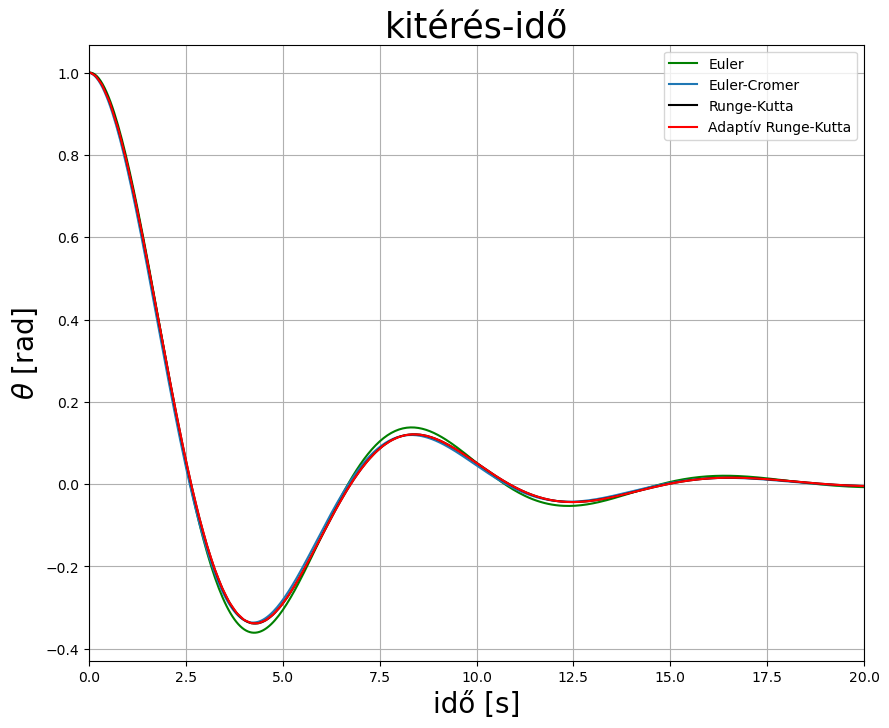

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,theta_damp1, label = "Euler", color = "green")
plt.plot(t_damp2,theta_damp2, label = "Euler-Cromer")
plt.plot(t_damp3,theta_damp3, label = "Runge-Kutta", color = "black")
plt.plot(t_damp4,theta_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("kitérés-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\theta$ [rad]", size = 20)
plt.grid(True)
plt.xlim(0,20)
# time - angle plot for the damped pendulum

(0.0, 20.0)

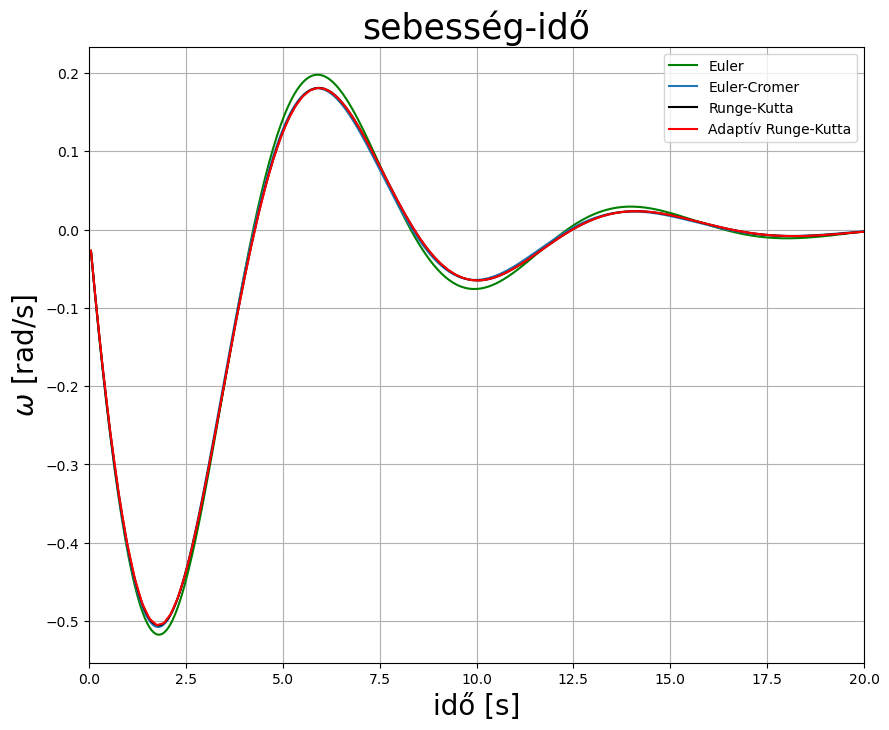

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,omega_damp1, label = "Euler", color = "green")
plt.plot(t_damp2,omega_damp2, label = "Euler-Cromer")
plt.plot(t_damp3,omega_damp3, label = "Runge-Kutta", color = "black")
plt.plot(t_damp4,omega_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("sebesség-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\omega$ [rad/s]", size = 20)
plt.grid(True)
plt.xlim(0,20)
#velocity - time plot for the damped pendulum

In [22]:
def plot_pendulum_motion_circular(theta,lenpen):
    x = np.sin(theta)*lenpen
    y = -np.cos(theta)*lenpen  
    plt.figure(figsize= (10,8))
    plt.plot(x,y, label='pálya', color='b')
    plt.title('Ingamozgás', size = 25)
    plt.xlabel('vizszintes kitérés [m]', size = 15)
    plt.ylabel('függőleges kitérés [m]', size = 15)
    plt.legend(fontsize = 15)
    plt.axis('equal')  
    plt.grid(True)
    return 

In [23]:
def plot_pendulum_motion_circular(theta, lenpen):
    x = np.sin(theta)[:300] * lenpen
    y = -np.cos(theta)[:300] * lenpen

    fig, axs = plt.subplots(3, 1, figsize=(20, 20), sharey=True)

    for i in range(3):
        start_idx = i * len(x) // 3
        end_idx = (i + 1) * len(x) // 3
        axs[i].plot(x[start_idx:end_idx], y[start_idx:end_idx], color='b', lw = 2)
        axs[i].set_title(f'Lengés: {i+1}.',size = 30)
        axs[i].axis('equal')
        axs[i].grid(True)
        axs[i].set_xlabel('vizszintes kitérés [m]', size=25)
        axs[i].set_ylabel('függőleges kitérés [m]', size=25)
        axs[i].tick_params(axis='both', which='major', labelsize=20)
        
   

   
    plt.tight_layout()
    plt.show()

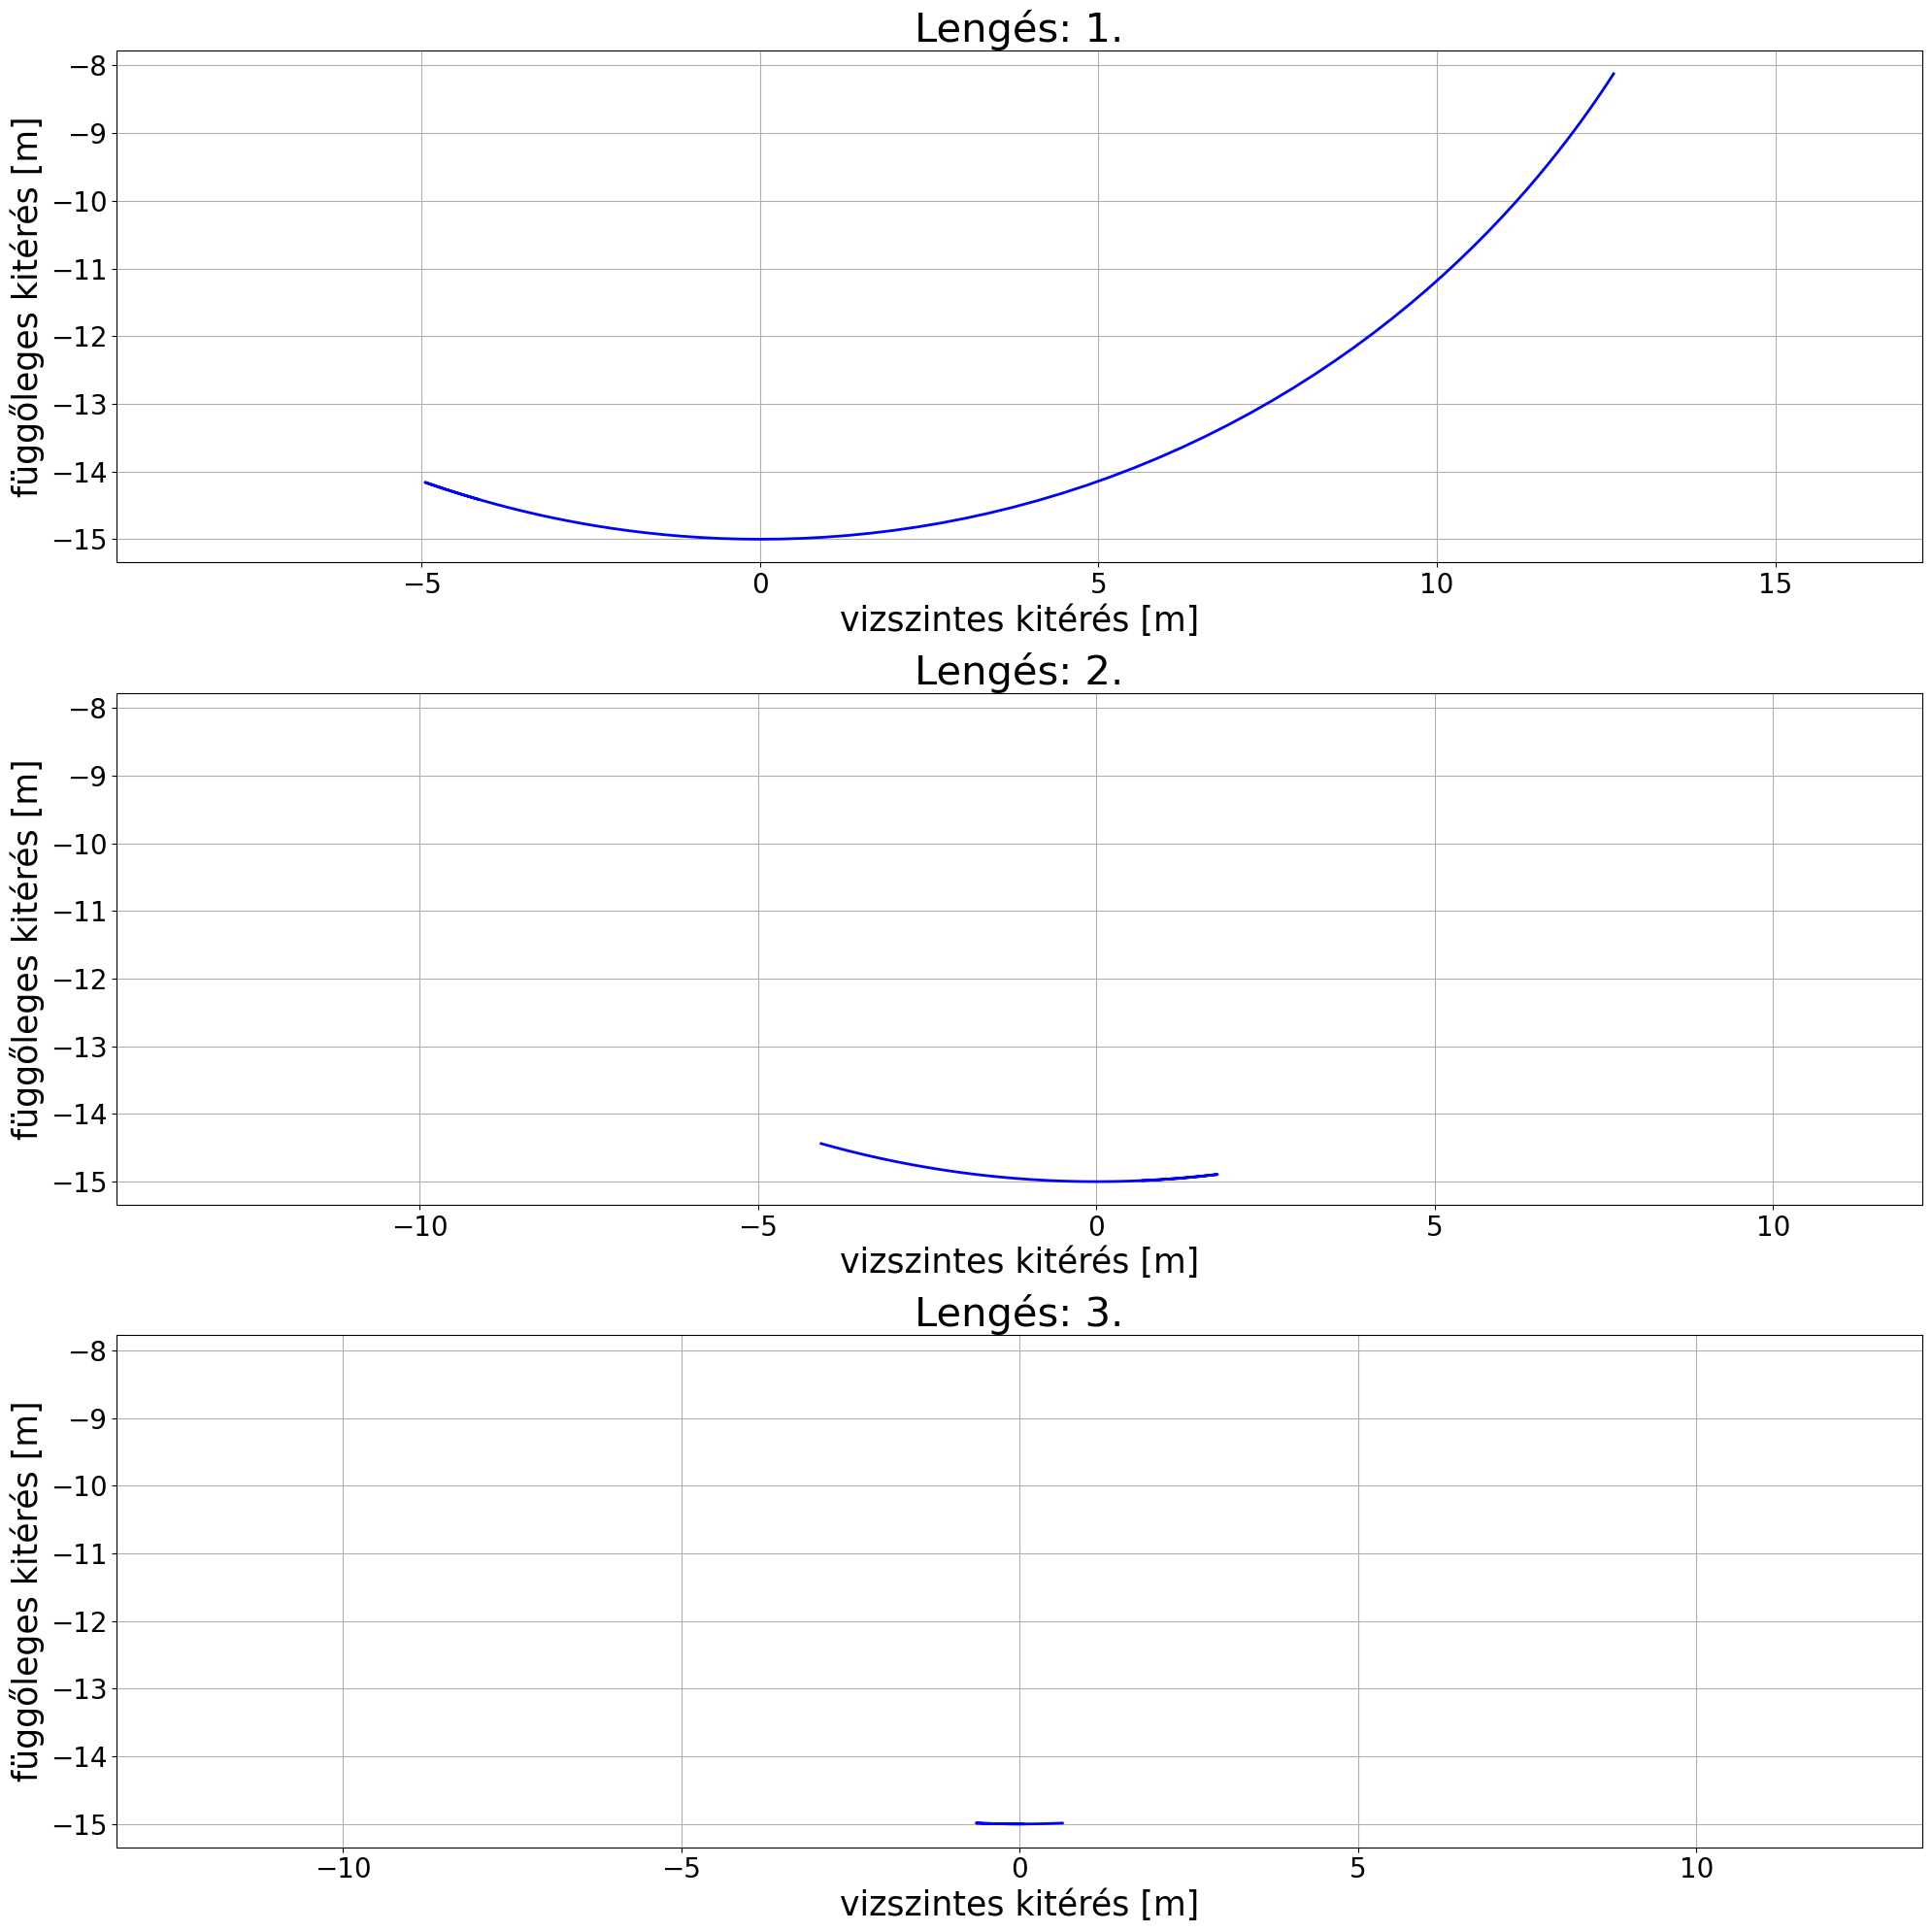

In [ ]:
plot_pendulum_motion_circular(theta_damp2,15)
#the motion of the damped pendulum from a side view for the first three periods.

In [25]:
energyeuler = energy(theta_damp1,omega_damp1,1,15)
energyeulercromer = energy(theta_damp2,omega_damp2,1,15)
energyrunge = energy(theta_damp3,omega_damp3,1,15)
energyadaptrunge = energy(theta_damp4,omega_damp4,1,15)

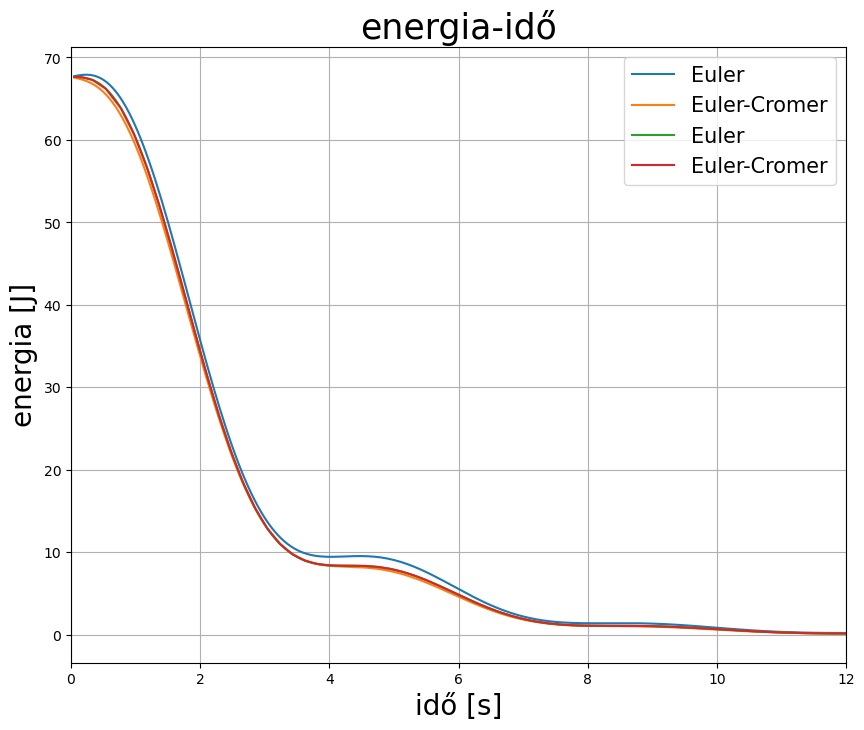

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,energyeuler, label = "Euler")
plt.plot(t_damp2,energyeulercromer, label = "Euler-Cromer")
plt.plot(t_damp3,energyrunge, label = "Euler")
plt.plot(t_damp4,energyadaptrunge, label = "Euler-Cromer")
plt.legend(loc = "upper right", fontsize= 15)
plt.title("energia-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel("energia [J]", size = 20)
plt.xlim(0,12)
plt.grid(True)
#energy - time plot for the damped pendulum

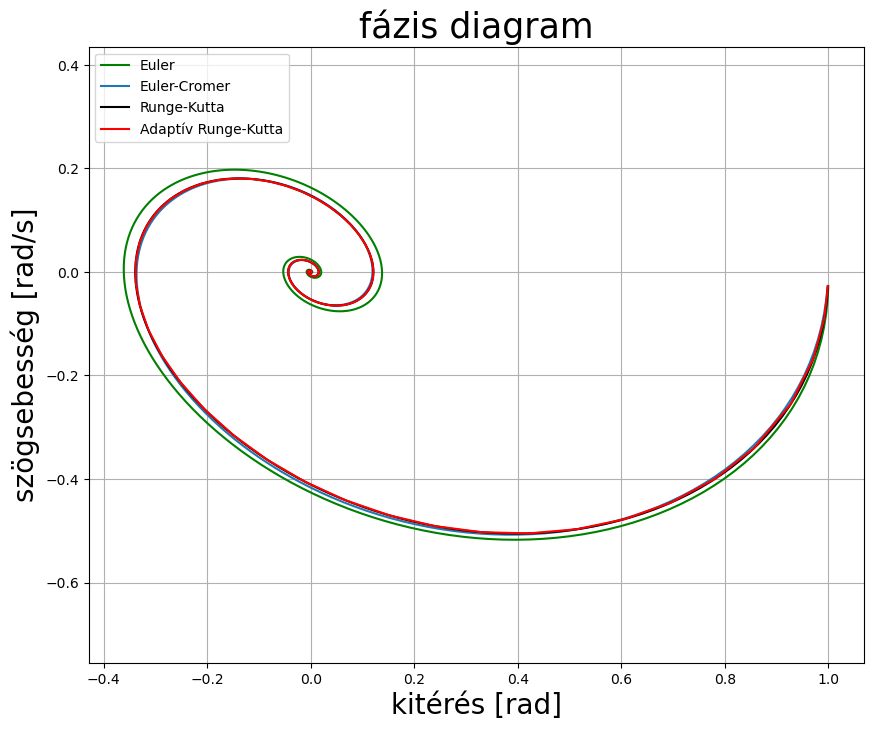

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(theta_damp1,omega_damp1, label = "Euler", color = "green")
plt.plot(theta_damp2,omega_damp2, label = "Euler-Cromer")
plt.plot(theta_damp3,omega_damp3, label = "Runge-Kutta", color = "black")
plt.plot(theta_damp4,omega_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.title("fázis diagram", size = 25)
plt.xlabel("kitérés [rad]", size = 20)
plt.ylabel("szögsebesség [rad/s]", size = 20)
plt.legend(loc = "upper left")
plt.axis('equal')
plt.grid(True)
#phase plot for the damped pendulum

## driven pendulum

In [28]:
t_damp1,theta_damp1,omega_damp1 = read_data('data1/euler-gerjeszt.data')
t_damp2,theta_damp2,omega_damp2 = read_data('data1/euler_cromer-gerjeszt.data')
t_damp3,theta_damp3,omega_damp3 = read_data('data1/runge_gerjeszt.data')
t_damp4,theta_damp4,omega_damp4 = read_data('data1/adaptive_gerjeszt.data')

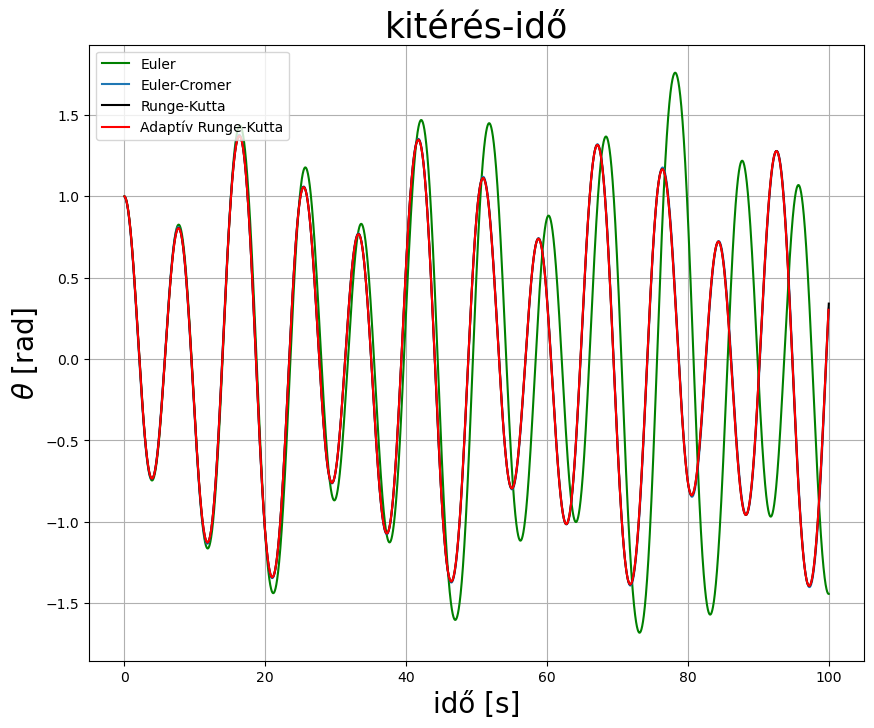

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,theta_damp1, label = "Euler", color = "green")
plt.plot(t_damp2,theta_damp2, label = "Euler-Cromer")
plt.plot(t_damp3,theta_damp3, label = "Runge-Kutta", color = "black")
plt.plot(t_damp4,theta_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("kitérés-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\theta$ [rad]", size = 20)
plt.grid(True)
#position - time plot for the driven pendulum

Text(0.5, 0, 'idő [s]')

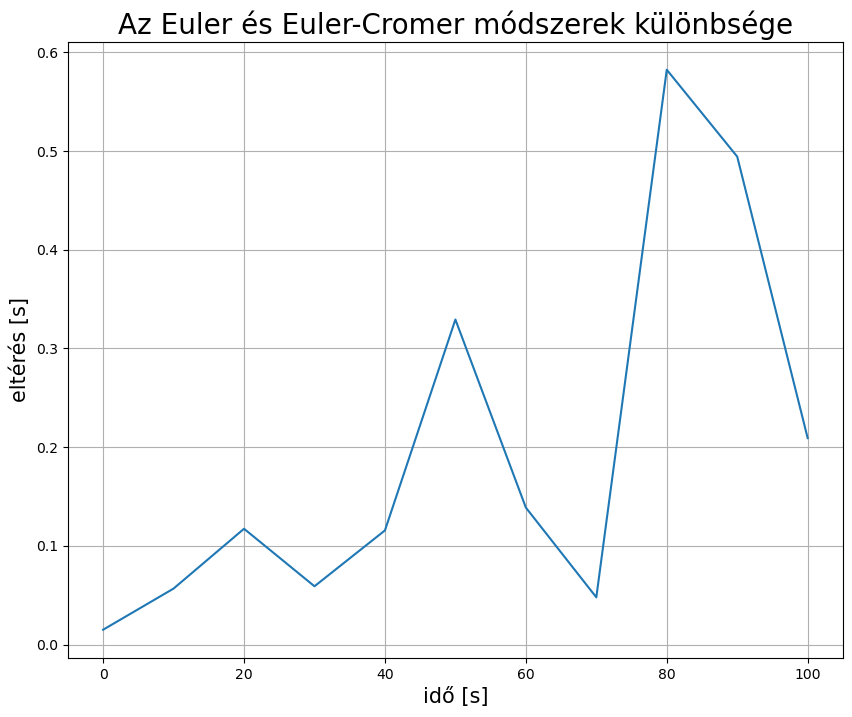

In [ ]:
from scipy.signal import find_peaks
plt.figure(figsize= (10,8))
peak1 = find_peaks(theta_damp1)
peak2 = find_peaks(theta_damp2)
diff = theta_damp1[peak1[0]] -theta_damp2[peak2[0]]
timediff = np.linspace(0,100,11)
#x = [0,timediff[3465]]
#y = [0.01,0.01]
#x2 = [timediff[3465],timediff[3465]]
#y2 = [0,0.01]
plt.plot(timediff,abs(diff))
#plt.plot(x,y, color = "red", alpha = 0.5)
#plt.plot(x2,y2, color = "red", alpha = 0.5)
plt.grid(True)
plt.title("Az Euler és Euler-Cromer módszerek különbsége", size = 20)
plt.ylabel("eltérés [s]", size = 15)
plt.xlabel("idő [s]", size = 15)
#comparison between the different euler methods in this case

Text(0.5, 0, 'idő [s]')

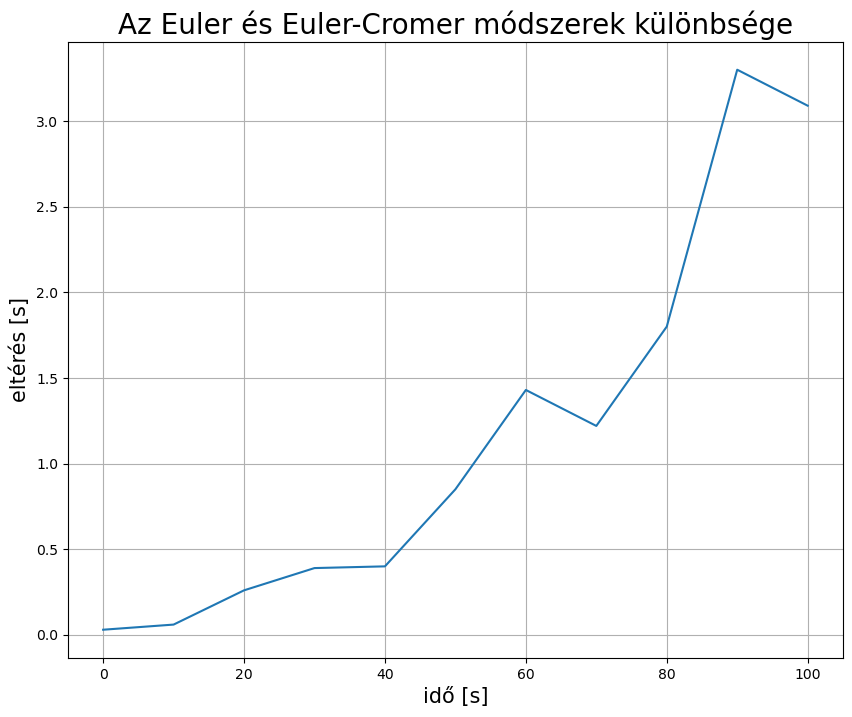

In [31]:
from scipy.signal import find_peaks
plt.figure(figsize= (10,8))
peak1 = find_peaks(theta_damp1)
peak2 = find_peaks(theta_damp2)
diff = t_damp1[peak1[0]] -t_damp2[peak2[0]]
timediff = np.linspace(0,100,11)
#x = [0,timediff[3465]]
#y = [0.01,0.01]
#x2 = [timediff[3465],timediff[3465]]
#y2 = [0,0.01]
plt.plot(timediff,abs(diff))
#plt.plot(x,y, color = "red", alpha = 0.5)
#plt.plot(x2,y2, color = "red", alpha = 0.5)
plt.grid(True)
plt.title("Az Euler és Euler-Cromer módszerek különbsége", size = 20)
plt.ylabel("eltérés [s]", size = 15)
plt.xlabel("idő [s]", size = 15)

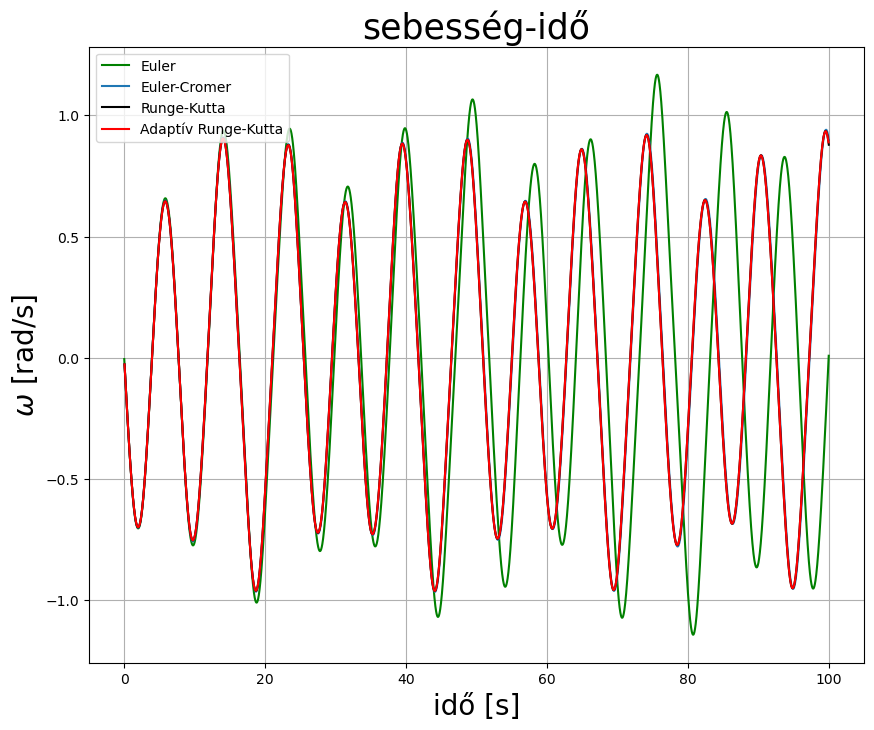

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,omega_damp1, label = "Euler", color = "green")
plt.plot(t_damp2,omega_damp2, label = "Euler-Cromer")
plt.plot(t_damp3,omega_damp3, label = "Runge-Kutta", color = "black")
plt.plot(t_damp4,omega_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("sebesség-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\omega$ [rad/s]", size = 20)
plt.grid(True)
#velocity-time plot

In [33]:
energyeuler = energy(theta_damp1,omega_damp1,1,15)
energyeulercromer = energy(theta_damp2,omega_damp2,1,15)
energyrunge = energy(theta_damp3,omega_damp3,1,15)
energyadaptrunge = energy(theta_damp4,omega_damp4,1,15)

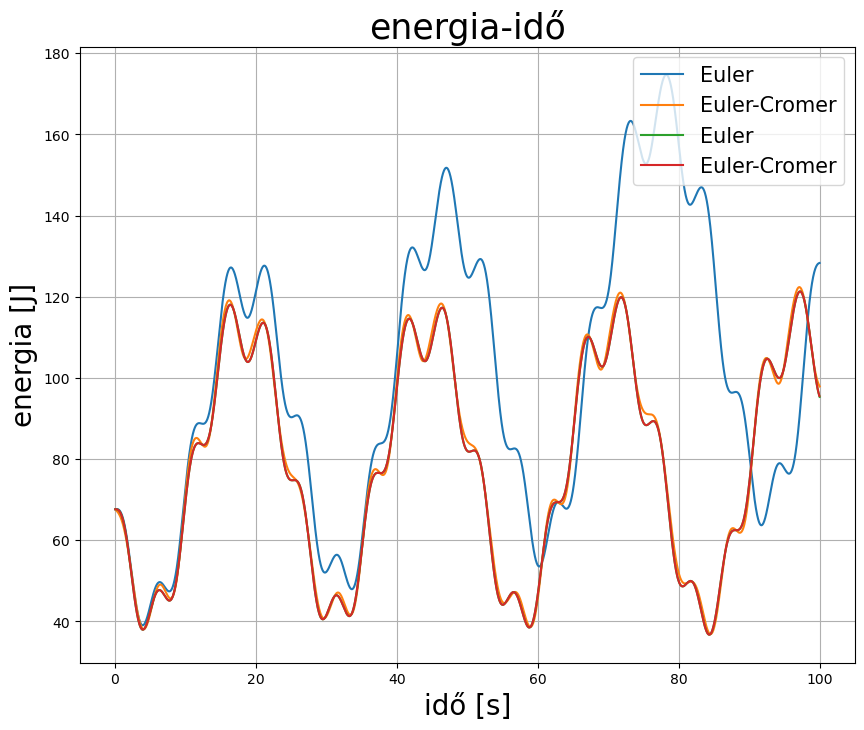

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,energyeuler, label = "Euler")
plt.plot(t_damp2,energyeulercromer, label = "Euler-Cromer")
plt.plot(t_damp3,energyrunge, label = "Euler")
plt.plot(t_damp4,energyadaptrunge, label = "Euler-Cromer")
plt.legend(loc = "upper right", fontsize= 15)
plt.title("energia-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel("energia [J]", size = 20)
plt.grid(True)
#energy - time plot

In [ ]:
def plot_pendulum_motion_circular(theta, lenpen):
    x = np.sin(theta)[:450] * lenpen
    y = -np.cos(theta)[:] * lenpen

    fig, axs = plt.subplots(5, 1, figsize=(20, 20), sharey=True)

    for i in range(5):
        start_idx = i * len(x) // 5
        end_idx = (i + 1) * len(x) // 5
        axs[i].plot(x[start_idx:end_idx], y[start_idx:end_idx], color='b', lw = 2)
        axs[i].set_title(f'Lengés: {i+1}.',size = 30)
        axs[i].axis('equal')
        axs[i].grid(True)
        
        axs[i].tick_params(axis='both', which='major', labelsize=20)
    axs[-1].set_xlabel('vizszintes kitérés [m]', size=35)
    axs[2].set_ylabel('függőleges kitérés [m]', size=35)
   

   
    plt.tight_layout()
    plt.show()
    #the motion of the pendulum from a sideview

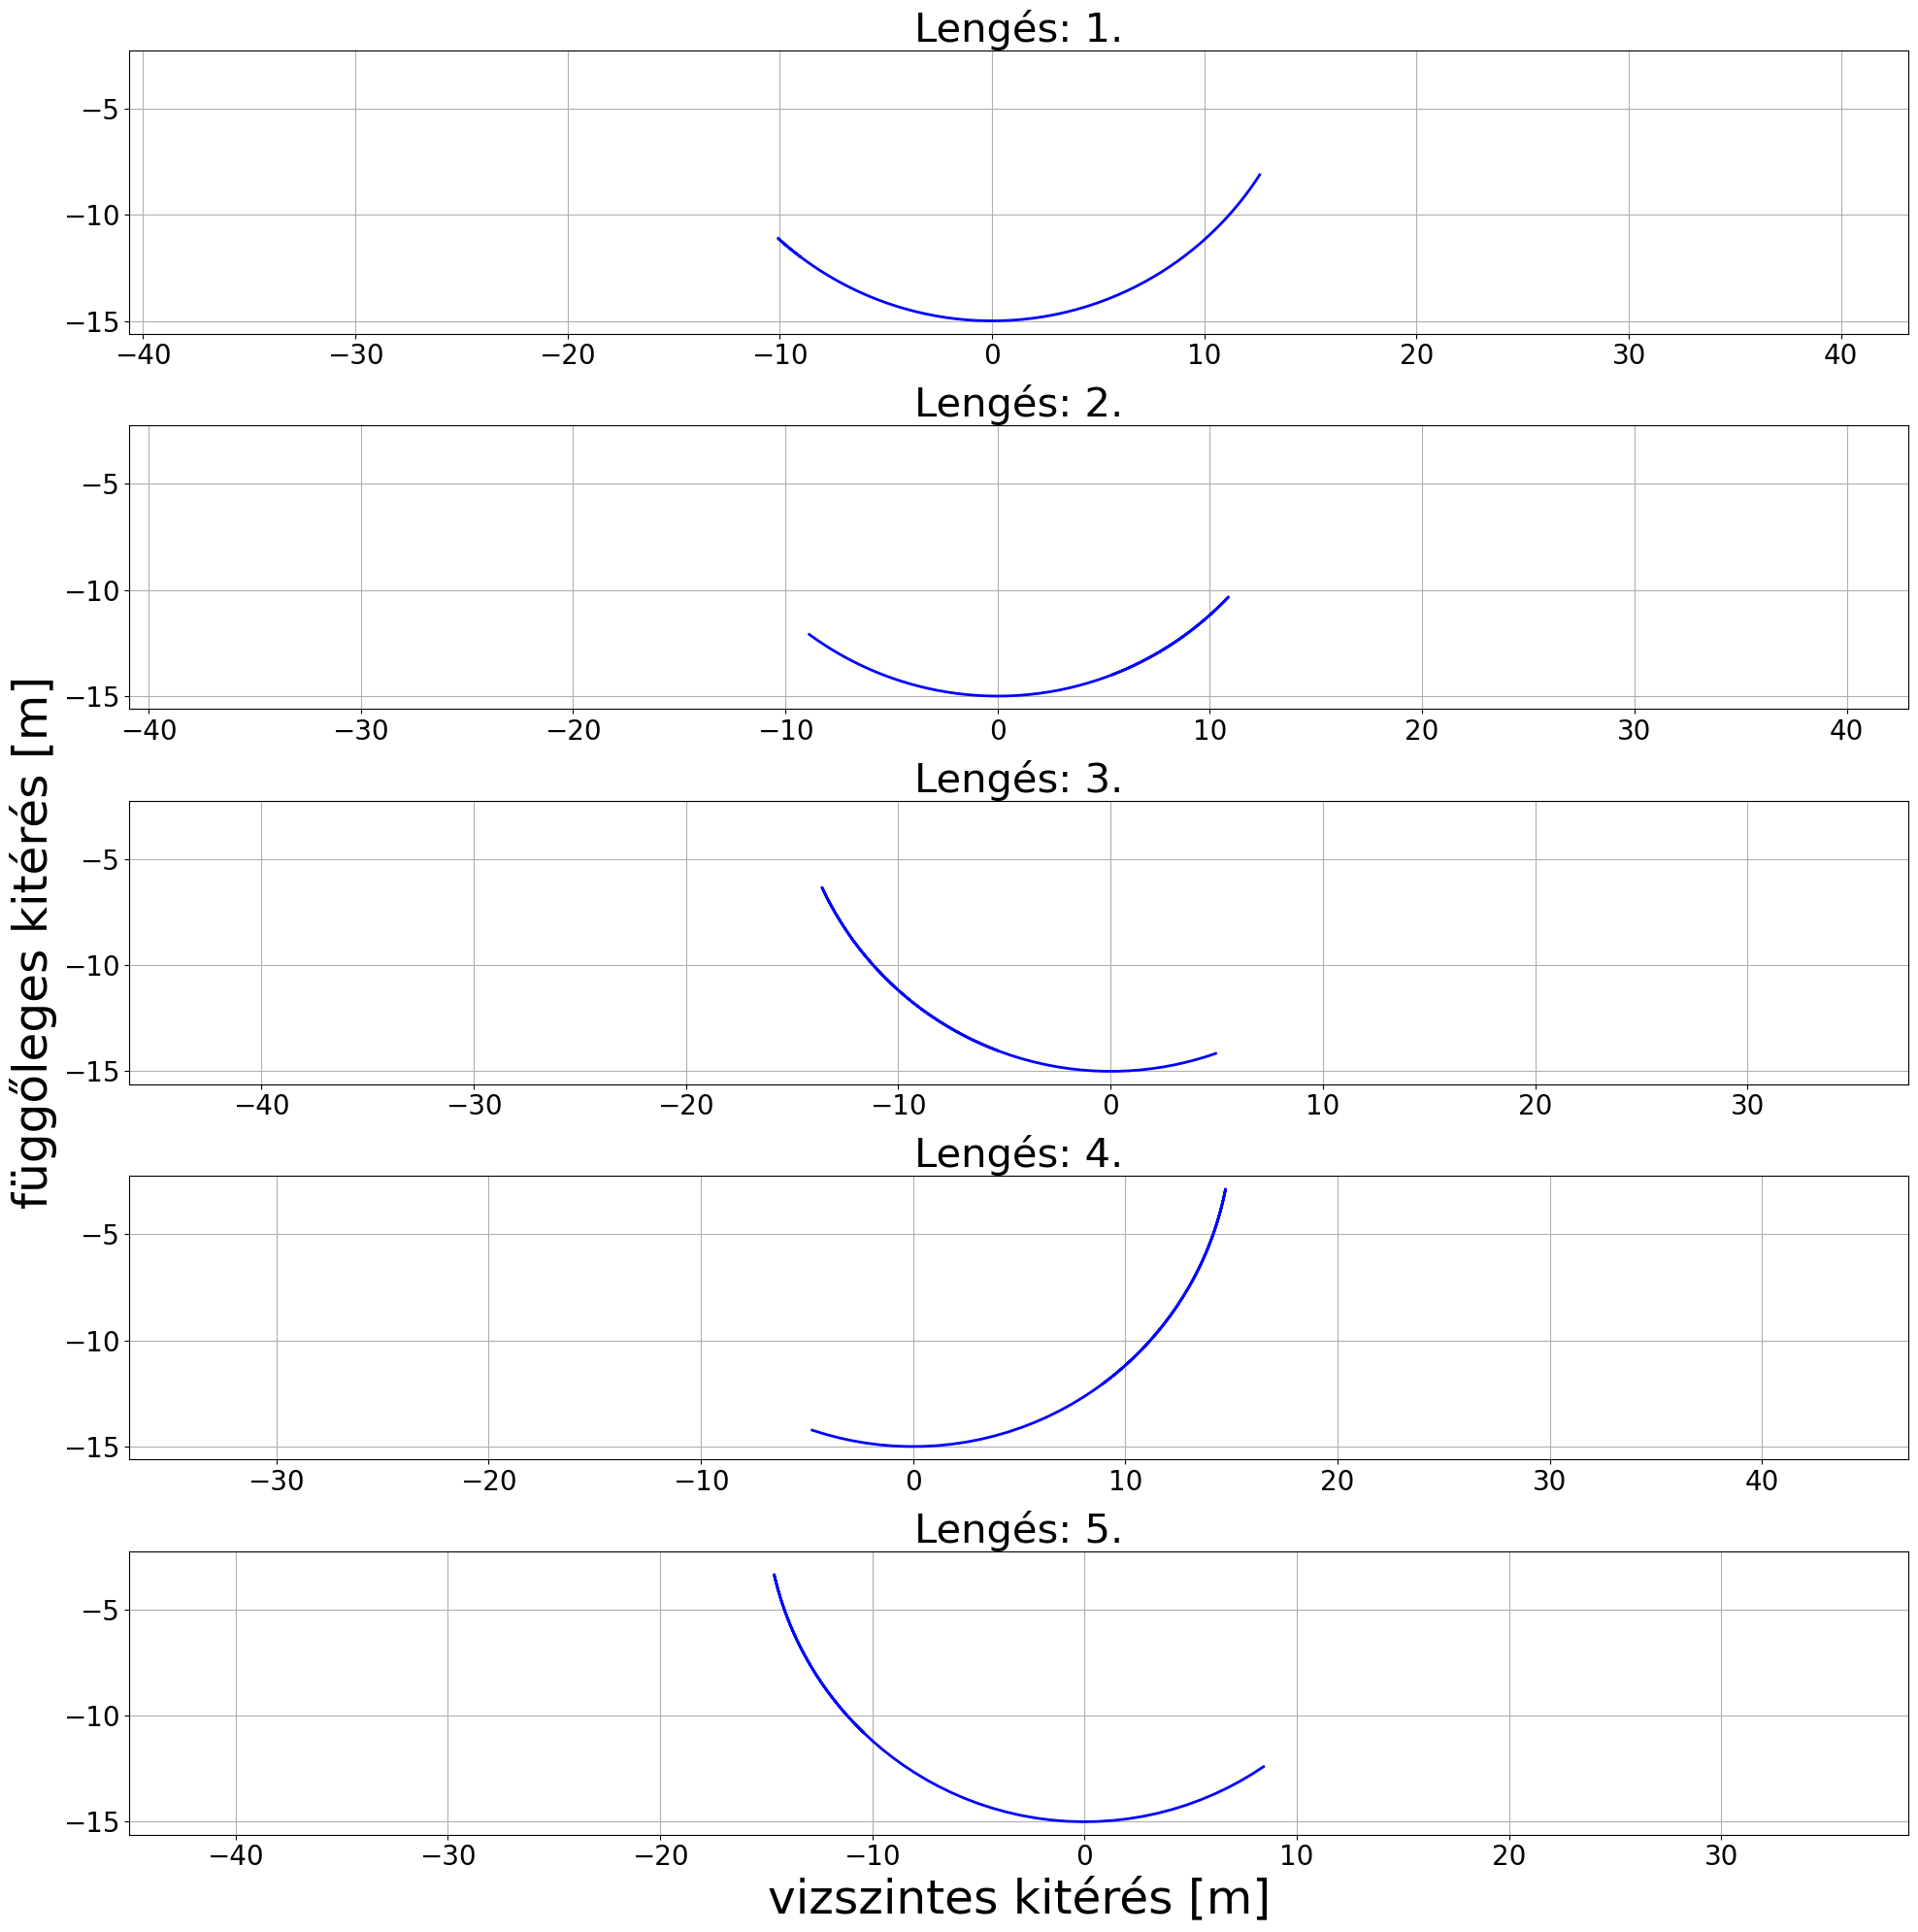

In [36]:
plot_pendulum_motion_circular(theta_damp2,15)

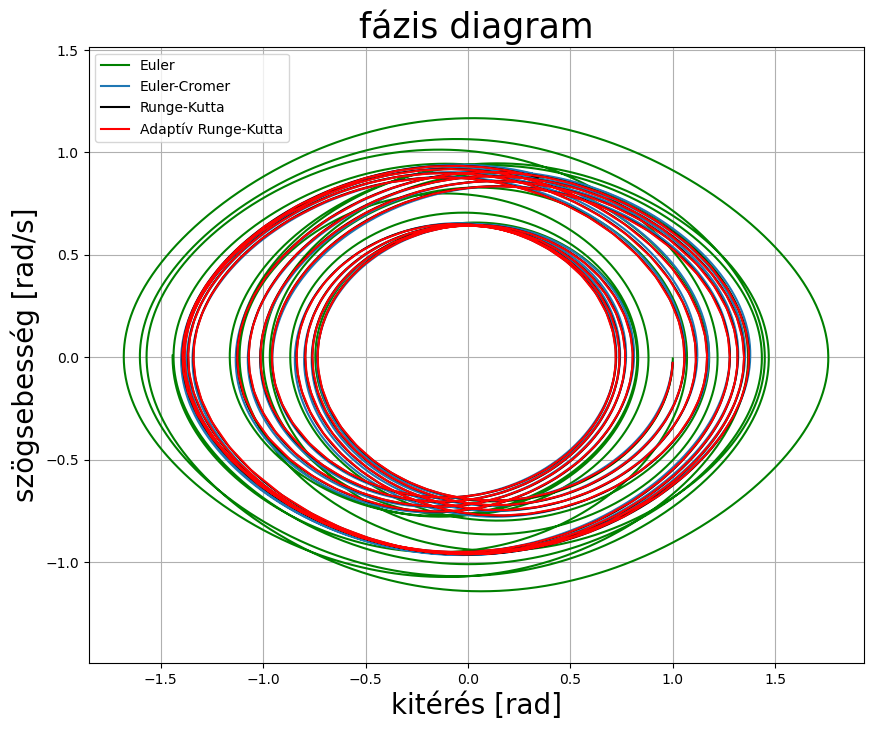

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(theta_damp1,omega_damp1, label = "Euler", color = "green")
plt.plot(theta_damp2,omega_damp2, label = "Euler-Cromer")
plt.plot(theta_damp3,omega_damp3, label = "Runge-Kutta", color = "black")
plt.plot(theta_damp4,omega_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.title("fázis diagram", size = 25)
plt.xlabel("kitérés [rad]", size = 20)
plt.ylabel("szögsebesség [rad/s]", size = 20)
plt.legend(loc = "upper left")
plt.axis('equal')
plt.grid(True)
#phase diagram

In [38]:
#When running the Euler I set the dt to 0.01, otherwise
#it became too unstable, and the results were useless.

### Physical pendulum - try one

In [39]:
#Physical pendulum : example brigde, wind blows - > drive , friction -> damping 

In [40]:
t_damp1,theta_damp1,omega_damp1 = read_data('data1/euler-physical.data')
t_damp2,theta_damp2,omega_damp2 = read_data('data1/euler_cromer-physical.data')
t_damp3,theta_damp3,omega_damp3 = read_data('data1/runge_physical.data')
t_damp4,theta_damp4,omega_damp4 = read_data('data1/adaptive_physical.data')

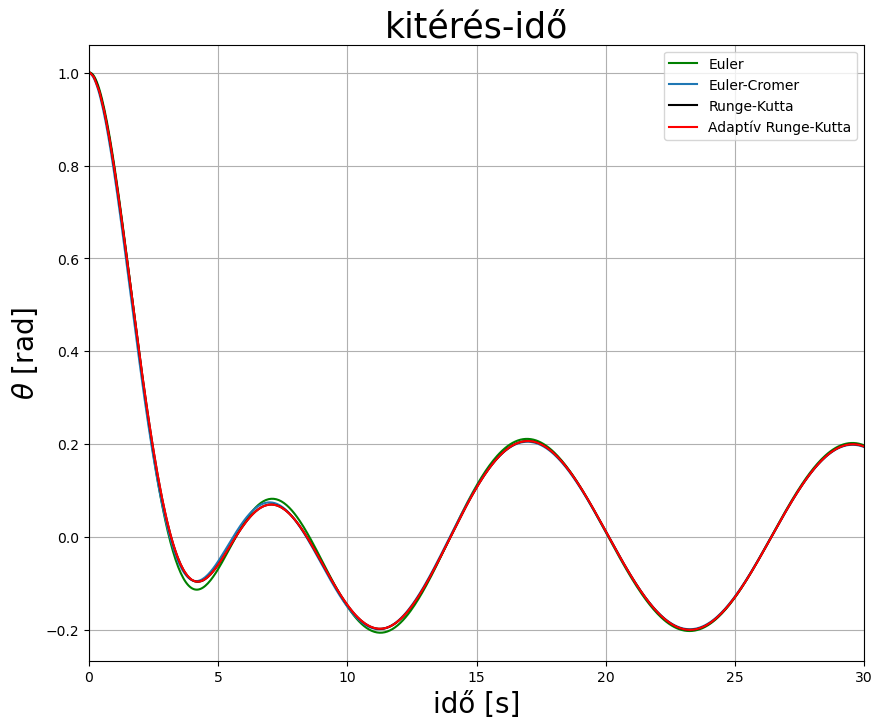

In [41]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,theta_damp1, label = "Euler", color = "green")
plt.plot(t_damp2,theta_damp2, label = "Euler-Cromer")
plt.plot(t_damp3,theta_damp3, label = "Runge-Kutta", color = "black")
plt.plot(t_damp4,theta_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("kitérés-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\theta$ [rad]", size = 20)
plt.xlim(0,30)
plt.grid(True)

In [42]:
#len 15m, q:0.6 ,0.5,0.1,1,0,100

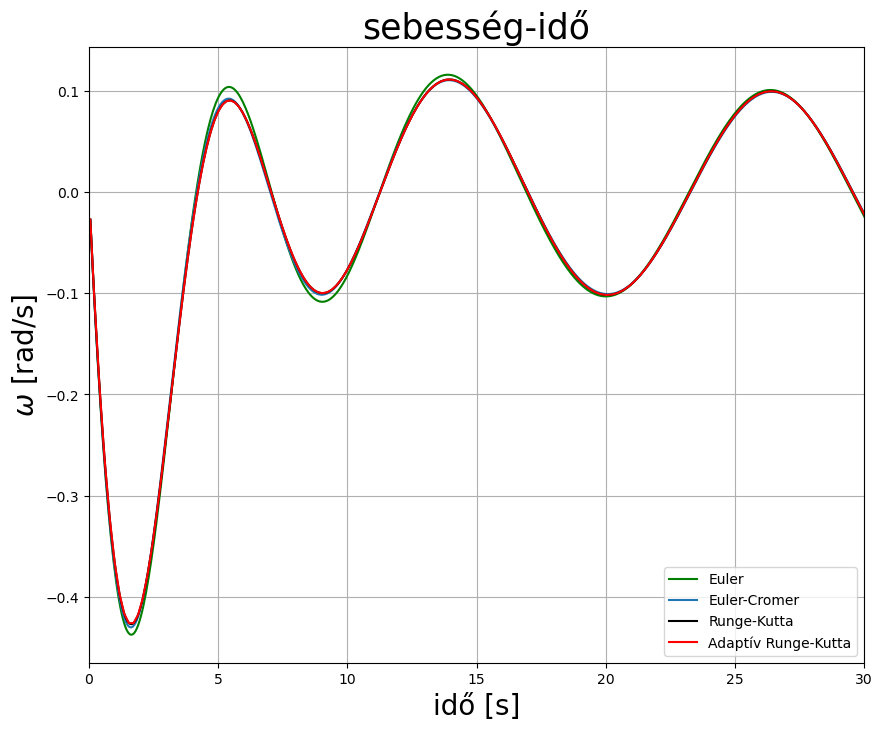

In [43]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,omega_damp1, label = "Euler", color = "green")
plt.plot(t_damp2,omega_damp2, label = "Euler-Cromer")
plt.plot(t_damp3,omega_damp3, label = "Runge-Kutta", color = "black")
plt.plot(t_damp4,omega_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("sebesség-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\omega$ [rad/s]", size = 20)
plt.xlim(0,30)
plt.grid(True)

In [44]:
energyeuler = energy(theta_damp1,omega_damp1,1,15)
energyeulercromer = energy(theta_damp2,omega_damp2,1,15)
energyrunge = energy(theta_damp3,omega_damp3,1,15)
energyadaptrunge = energy(theta_damp4,omega_damp4,1,15)

(0.0, 30.0)

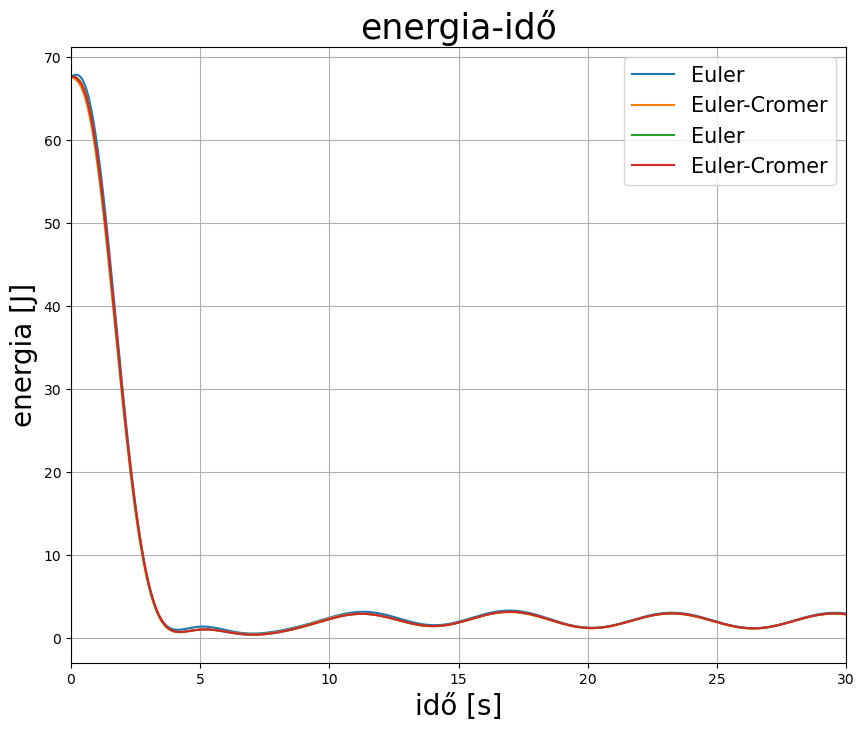

In [45]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,energyeuler, label = "Euler")
plt.plot(t_damp2,energyeulercromer, label = "Euler-Cromer")
plt.plot(t_damp3,energyrunge, label = "Euler")
plt.plot(t_damp4,energyadaptrunge, label = "Euler-Cromer")
plt.legend(loc = "upper right", fontsize= 15)
plt.title("energia-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel("energia [J]", size = 20)
plt.grid(True)
plt.xlim(0,30)

In [46]:
def plot_pendulum_motion_circular(theta, lenpen):
    x = np.sin(theta)[:500] * lenpen
    y = -np.cos(theta)[:] * lenpen

    fig, axs = plt.subplots(5, 1, figsize=(20, 20), sharey=True)

    for i in range(5):
        start_idx = i * len(x) // 5
        end_idx = (i + 1) * len(x) // 5
        axs[i].plot(x[start_idx:end_idx], y[start_idx:end_idx], color='b', lw = 2)
        axs[i].set_title(f'Lengés: {i+1}.',size = 30)
        axs[i].axis('equal')
        axs[i].grid(True)
        
        axs[i].tick_params(axis='both', which='major', labelsize=20)
    axs[-1].set_xlabel('vizszintes kitérés [m]', size=35)
    axs[2].set_ylabel('függőleges kitérés [m]', size=35)
   

   
    plt.tight_layout()
    plt.show()

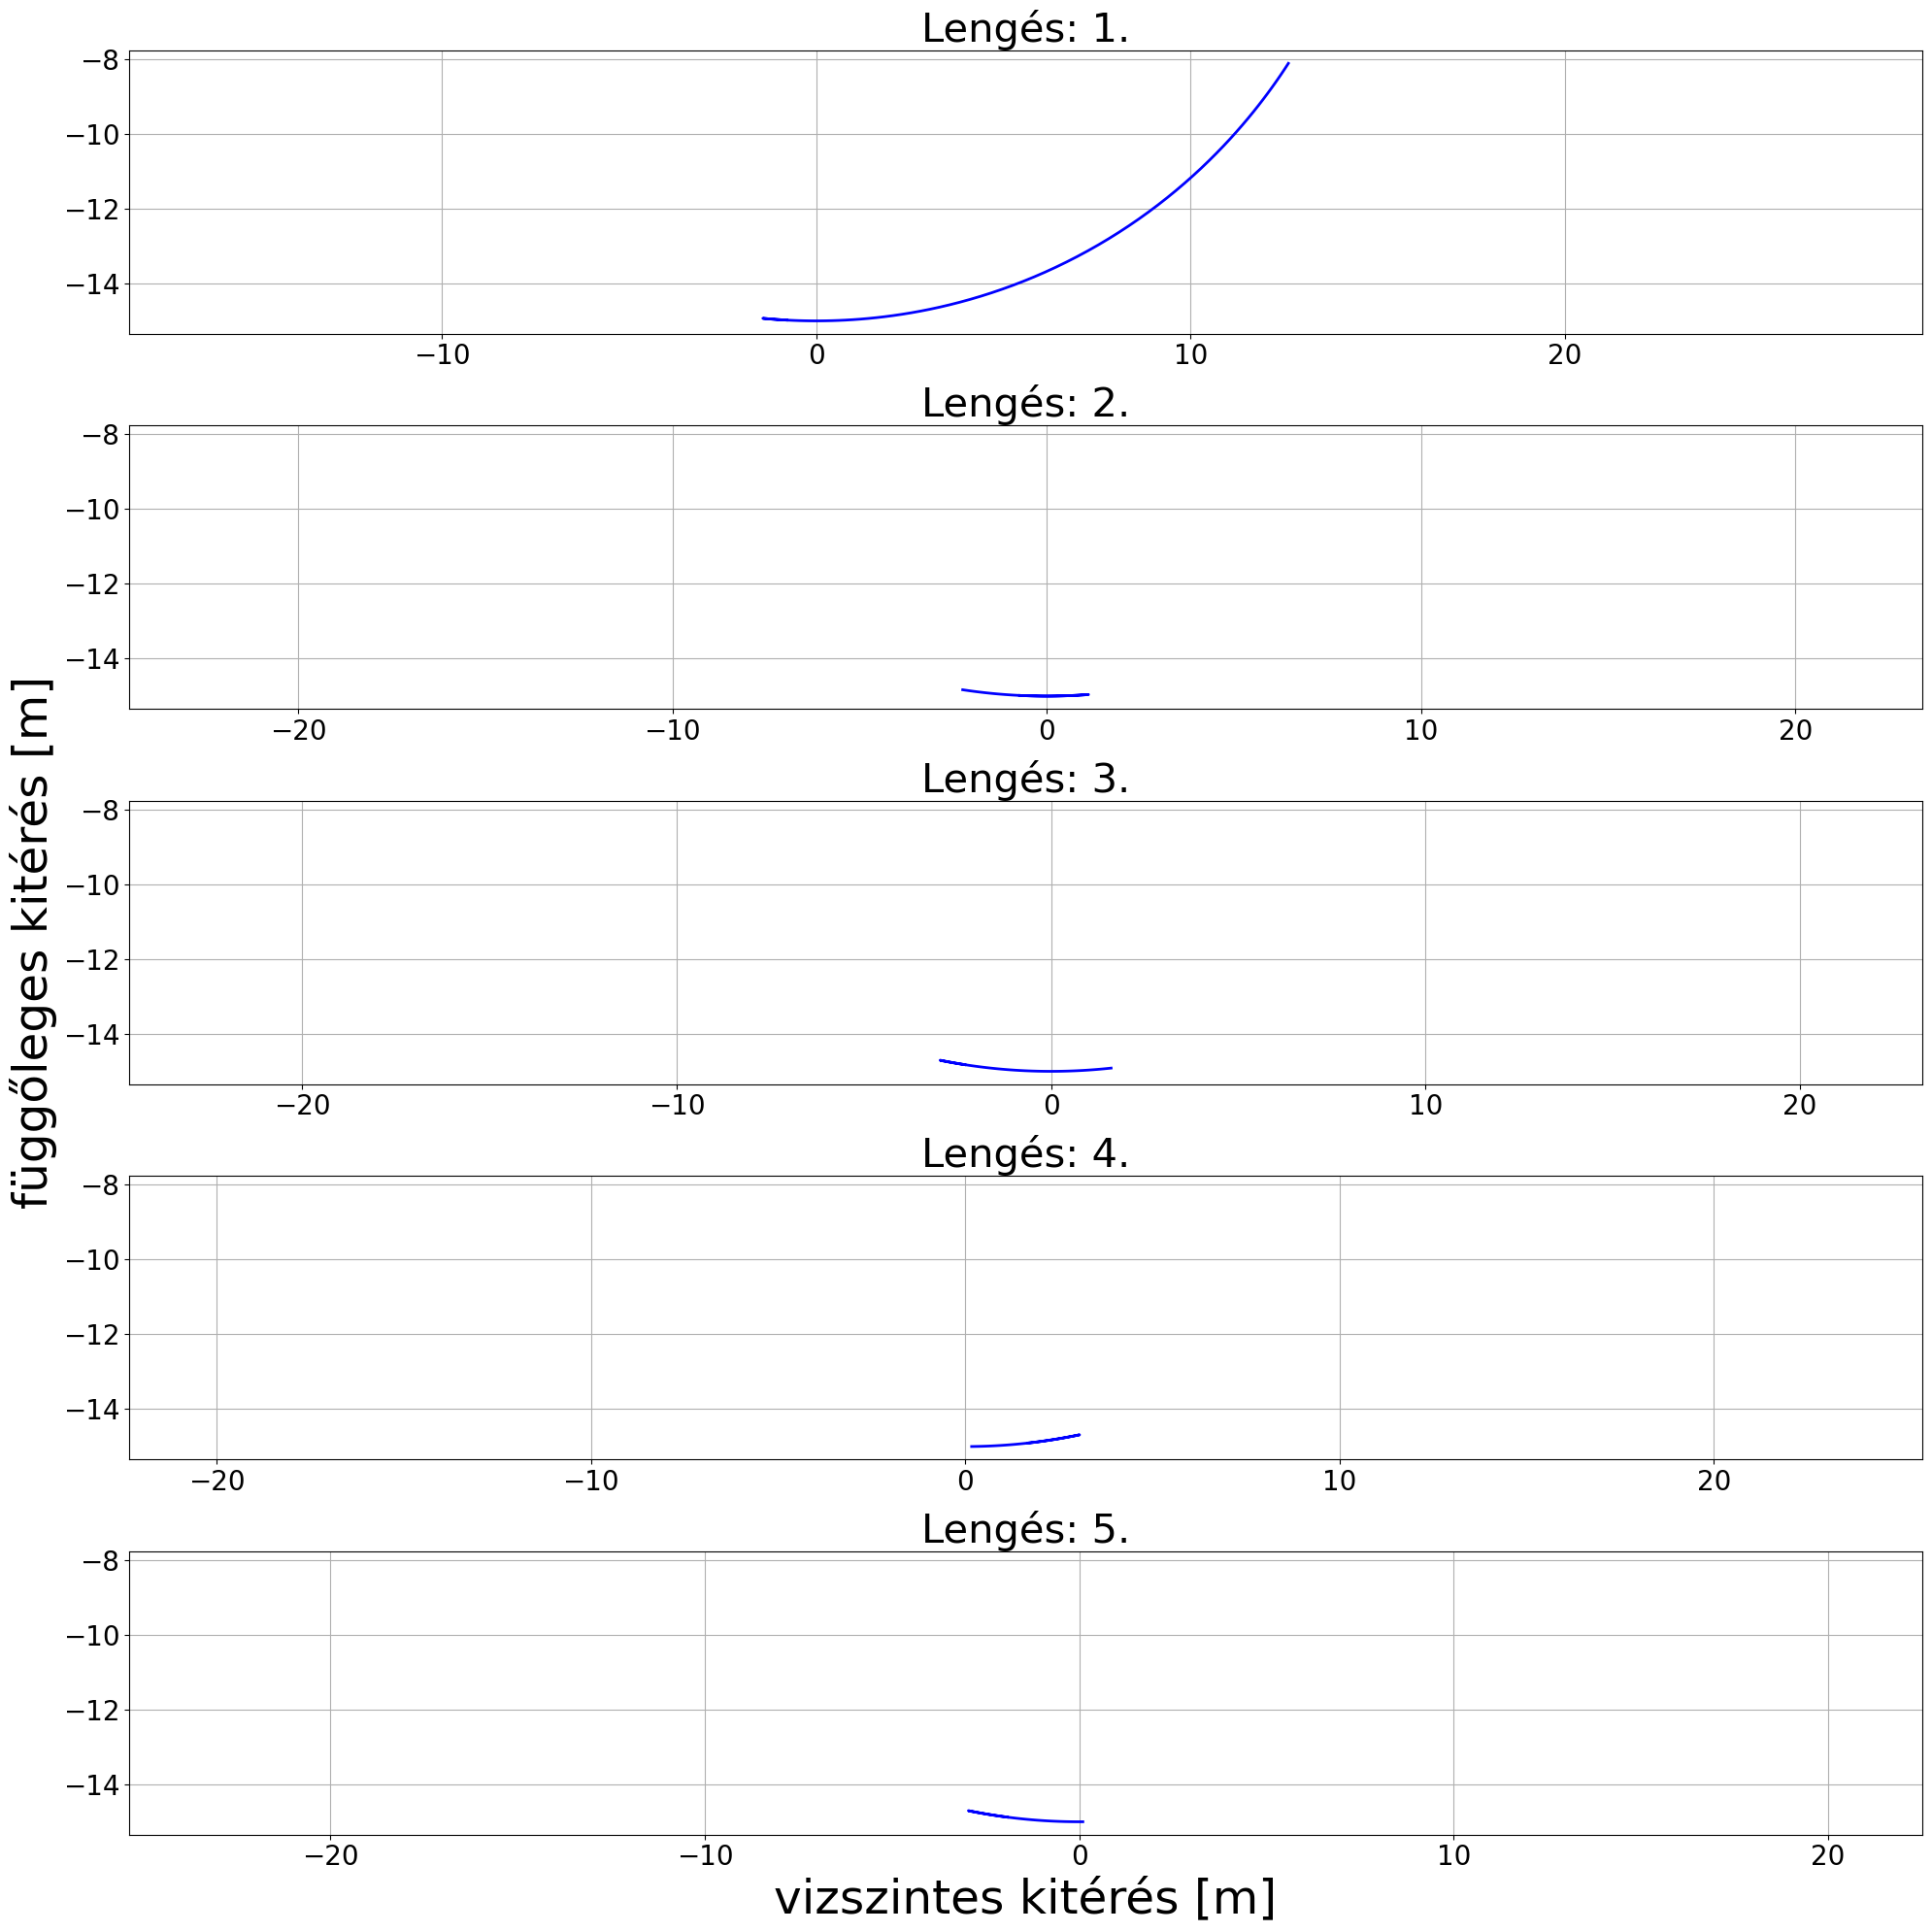

In [47]:
plot_pendulum_motion_circular(theta_damp2,15)

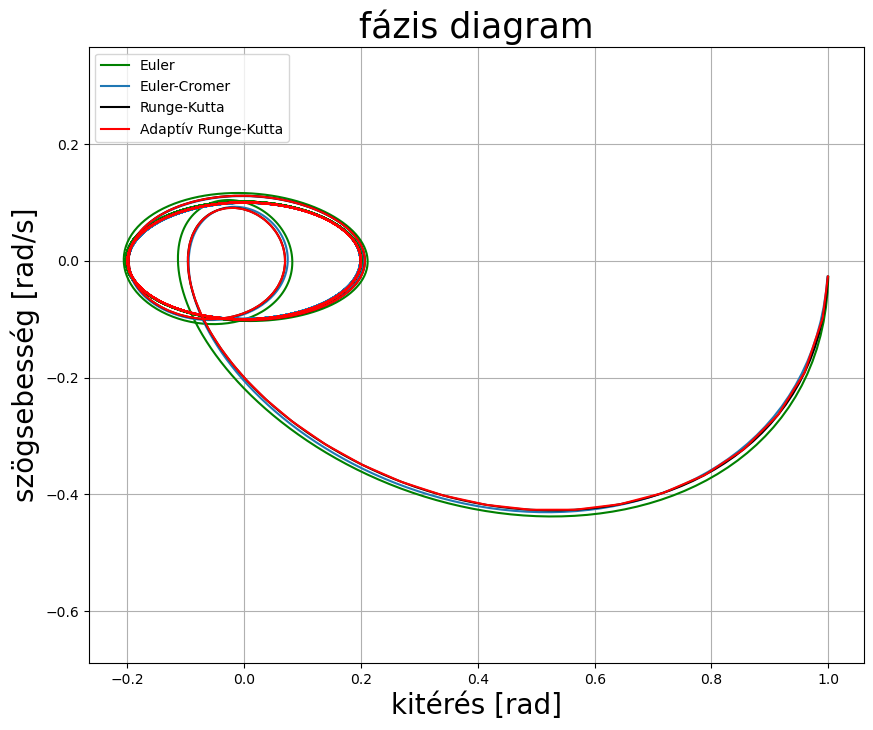

In [48]:
plt.figure(figsize= (10,8))
plt.plot(theta_damp1,omega_damp1, label = "Euler", color = "green")
plt.plot(theta_damp2,omega_damp2, label = "Euler-Cromer")
plt.plot(theta_damp3,omega_damp3, label = "Runge-Kutta", color = "black")
plt.plot(theta_damp4,omega_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.title("fázis diagram", size = 25)
plt.xlabel("kitérés [rad]", size = 20)
plt.ylabel("szögsebesség [rad/s]", size = 20)
plt.legend(loc = "upper left")
plt.axis('equal')
plt.grid(True)

## physical second try - different parameters

The Parameters:
* length 5 m
* damping coeff. 0.2
* driving frequency: 0.5 Hz
* driving apmlitude: 1 m 
* $\theta (0)$ 1
* $\omega(0)$ 0
* integration time: 20 s

In [49]:
t_damp1,theta_damp1,omega_damp1 = read_data('data2/euler_physical2.data')
t_damp2,theta_damp2,omega_damp2 = read_data('data2/euler_cromerphysical2.data')
t_damp3,theta_damp3,omega_damp3 = read_data('data2/runge_physical2.data')
t_damp4,theta_damp4,omega_damp4 = read_data('data2/adaptive2.data')

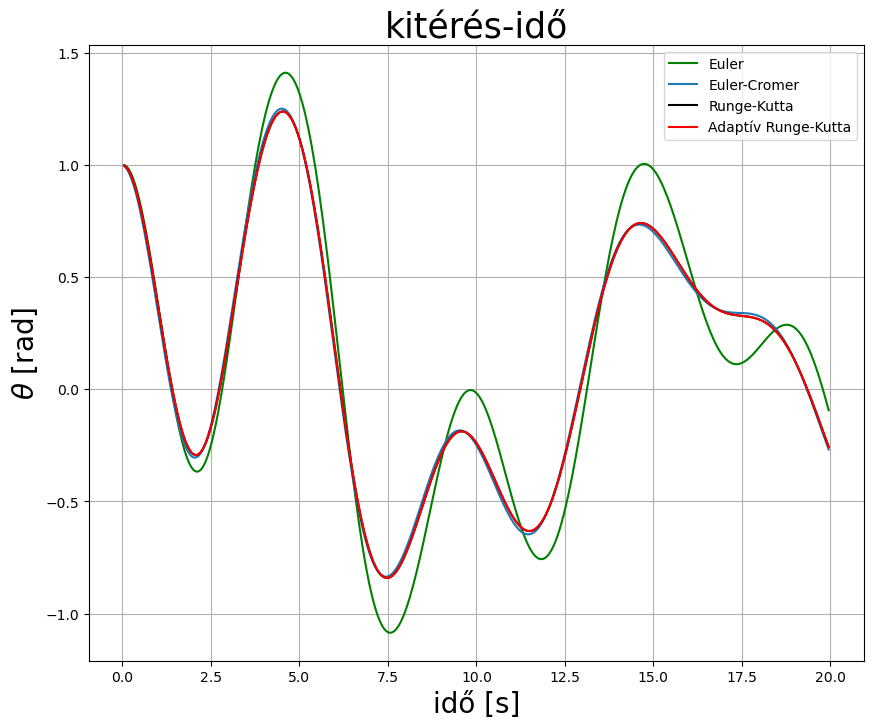

In [50]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,theta_damp1, label = "Euler", color = "green")
plt.plot(t_damp2,theta_damp2, label = "Euler-Cromer")
plt.plot(t_damp3,theta_damp3, label = "Runge-Kutta", color = "black")
plt.plot(t_damp4,theta_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("kitérés-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel(r"$\theta$ [rad]", size = 20)

plt.grid(True)

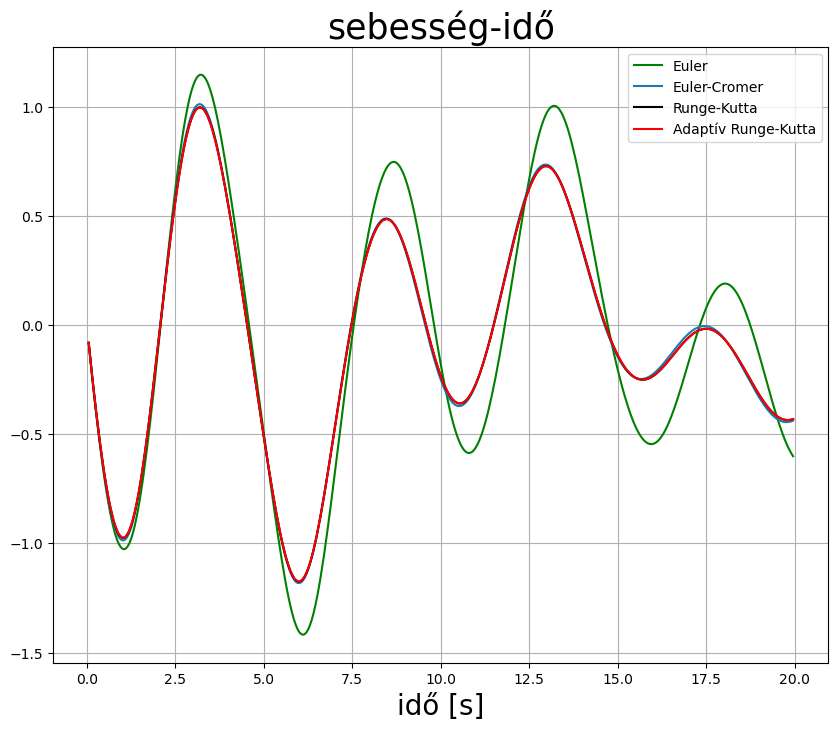

In [51]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,omega_damp1, label = "Euler", color = "green")
plt.plot(t_damp2,omega_damp2, label = "Euler-Cromer")
plt.plot(t_damp3,omega_damp3, label = "Runge-Kutta", color = "black")
plt.plot(t_damp4,omega_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.legend()
plt.title("sebesség-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.grid(True)

In [52]:
energyeuler = energy(theta_damp1,omega_damp1,1,5)
energyeulercromer = energy(theta_damp2,omega_damp2,1,5)
energyrunge = energy(theta_damp3,omega_damp3,1,5)
energyadaptrunge = energy(theta_damp4,omega_damp4,1,5)

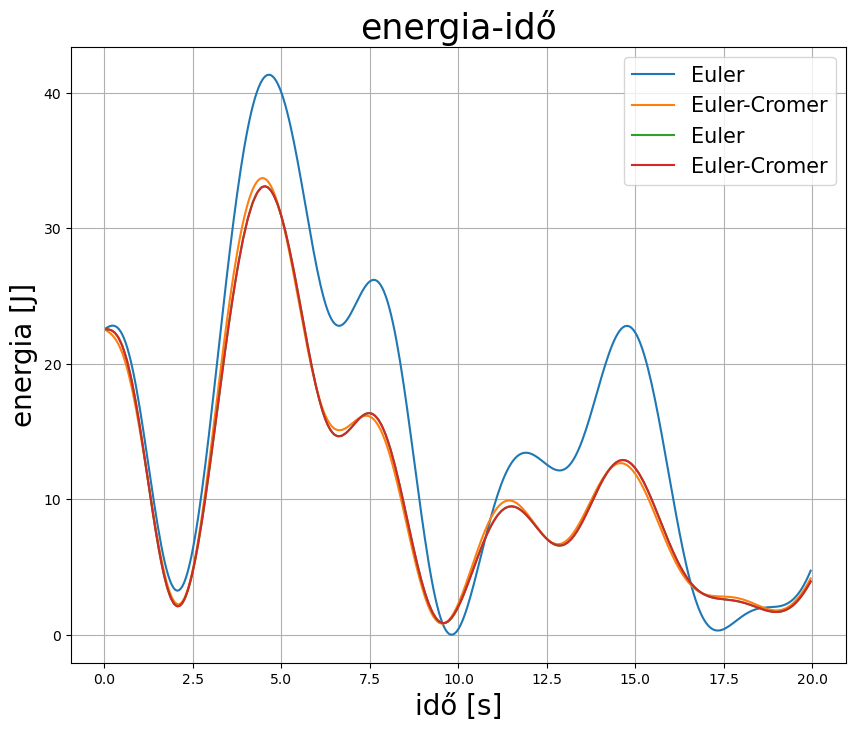

In [53]:
plt.figure(figsize= (10,8))
plt.plot(t_damp1,energyeuler, label = "Euler")
plt.plot(t_damp2,energyeulercromer, label = "Euler-Cromer")
plt.plot(t_damp3,energyrunge, label = "Euler")
plt.plot(t_damp4,energyadaptrunge, label = "Euler-Cromer")
plt.legend(loc = "upper right", fontsize= 15)
plt.title("energia-idő", size = 25)
plt.xlabel("idő [s]", size = 20)
plt.ylabel("energia [J]", size = 20)
plt.grid(True)


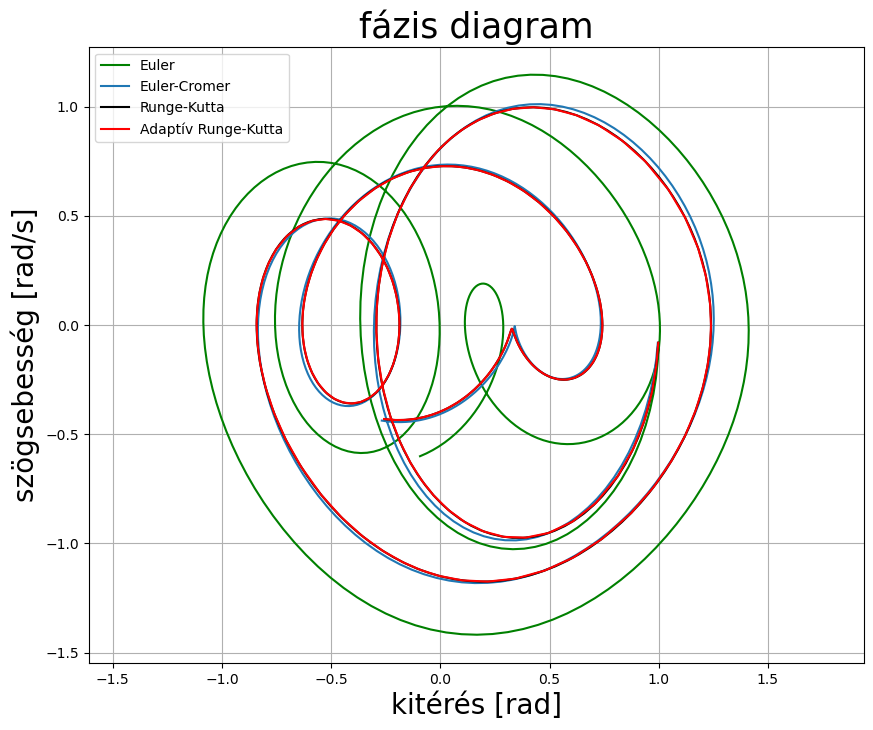

In [54]:
plt.figure(figsize= (10,8))
plt.plot(theta_damp1,omega_damp1, label = "Euler", color = "green")
plt.plot(theta_damp2,omega_damp2, label = "Euler-Cromer")
plt.plot(theta_damp3,omega_damp3, label = "Runge-Kutta", color = "black")
plt.plot(theta_damp4,omega_damp4, label = "Adaptív Runge-Kutta", color = "red")
plt.title("fázis diagram", size = 25)
plt.xlabel("kitérés [rad]", size = 20)
plt.ylabel("szögsebesség [rad/s]", size = 20)
plt.legend(loc = "upper left")
plt.axis('equal')
plt.grid(True)

## double pendulum

In [55]:
def read_data5(file_path):
    t_values = []
    theta1_values = []
    omega1_values = []
    theta2_values = []
    omega2_values = []

    
    with open(file_path, 'r') as file:
        for line in file:
            
            columns = line.strip().split('\t')

           
            t_values.append(float(columns[0]))
            theta1_values.append(float(columns[1]))
            omega1_values.append(float(columns[2]))
            theta2_values.append(float(columns[3]))
            omega2_values.append(float(columns[4]))

  
    t_array = np.array(t_values)
    theta1_array = np.array(theta1_values)
    omega1_array = np.array(omega1_values)
    theta2_array = np.array(theta2_values)
    omega2_array = np.array(omega2_values)

    return t_array, theta1_array, omega1_array,theta2_array, omega2_array

In [56]:
t_double,theta1_double,omega1_double, theta2_double, omega2_double = read_data5('data3/double_pendulum_simulation1.data')


In [57]:
def plot_double_pendulum(theta1,lenpen1,theta2,lenpen2):
    x = lenpen1 * np.sin(theta1) + lenpen2 * np.sin(theta1 +theta2)
    y = -(lenpen1 * np.cos(theta1) + lenpen2 * np.cos(theta1 + theta2))
    plt.figure(figsize= (10,8))
    plt.plot(x, y, label='pálya', color='b')
    plt.title('Kettős ingamozgás', size = 25)
    plt.xlabel('vizszintes kitérés [m]', size = 15)
    plt.ylabel('függőleges kitérés [m]', size = 15)
    plt.legend(fontsize = 15)
    plt.axis('equal')  
    plt.grid(True)

In [58]:
def phase(theta1_double,omega1_double, theta2_double, omega2_double):
    theta = theta1_double + theta2_double
    omega = omega2_double
    plt.figure(figsize= (10,8))
    plt.plot(theta,omega)
    plt.title('fázis diagram', size = 25)
    plt.xlabel('kitérés [rad]', size = 15)
    plt.ylabel('szögsebesség [rad/s]', size = 15)
    plt.grid(True)
    

In [59]:
t_double,theta1_double,omega1_double, theta2_double, omega2_double = read_data5('data3/double_pendulum_simulation2.data')


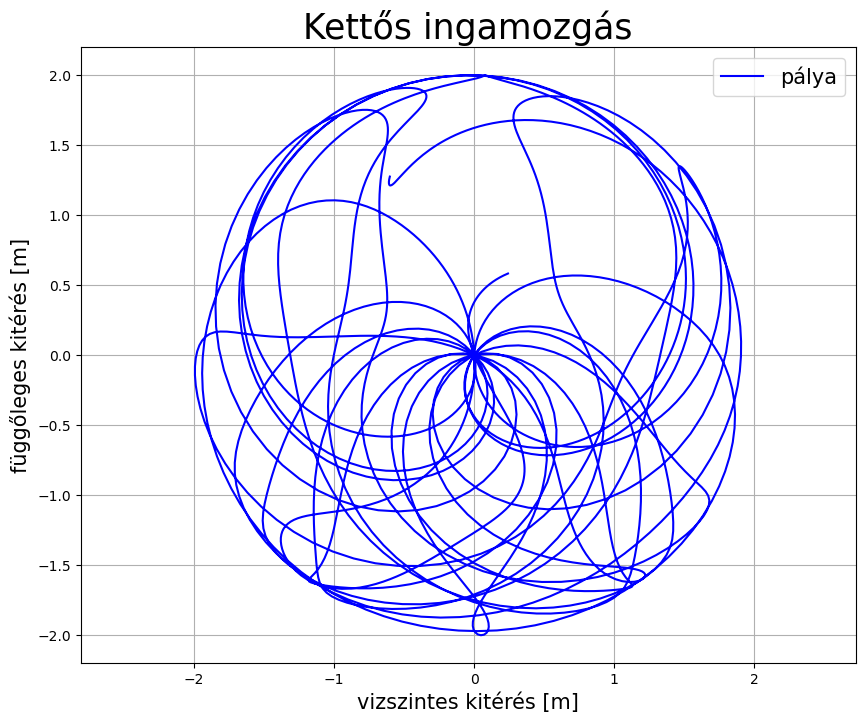

In [ ]:
plot_double_pendulum(theta1_double,1,theta2_double,1)
#the track of a double pendulum

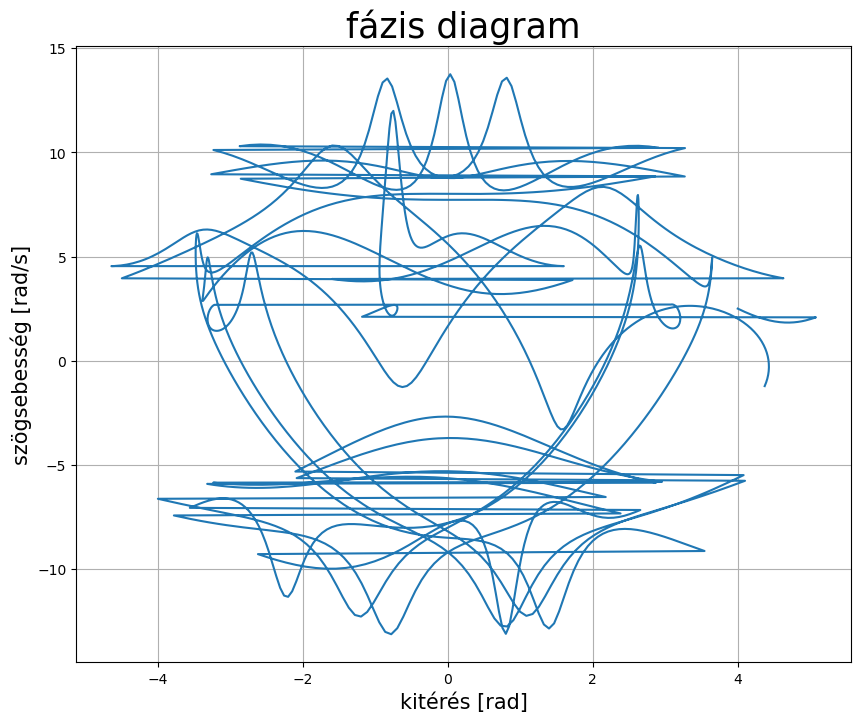

In [ ]:
phase(theta1_double,omega1_double,theta2_double,omega2_double)
#phase diagram

In [62]:
t_double,theta1_double,omega1_double, theta2_double, omega2_double = read_data5('data3/double_pendulum_simulation3.data')
##bigger theta + not zero starting omega

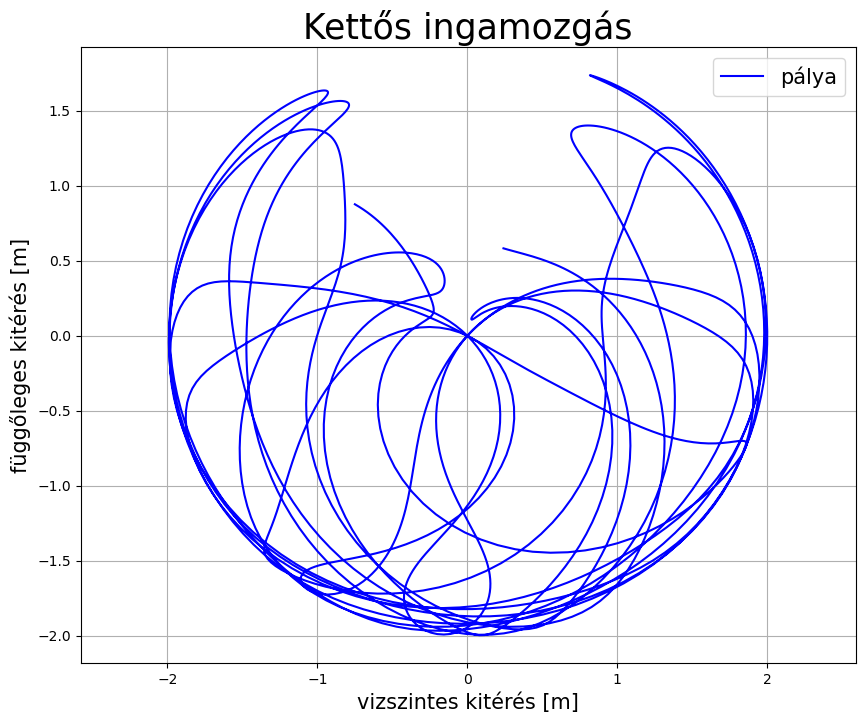

In [63]:
plot_double_pendulum(theta1_double,1,theta2_double,1)

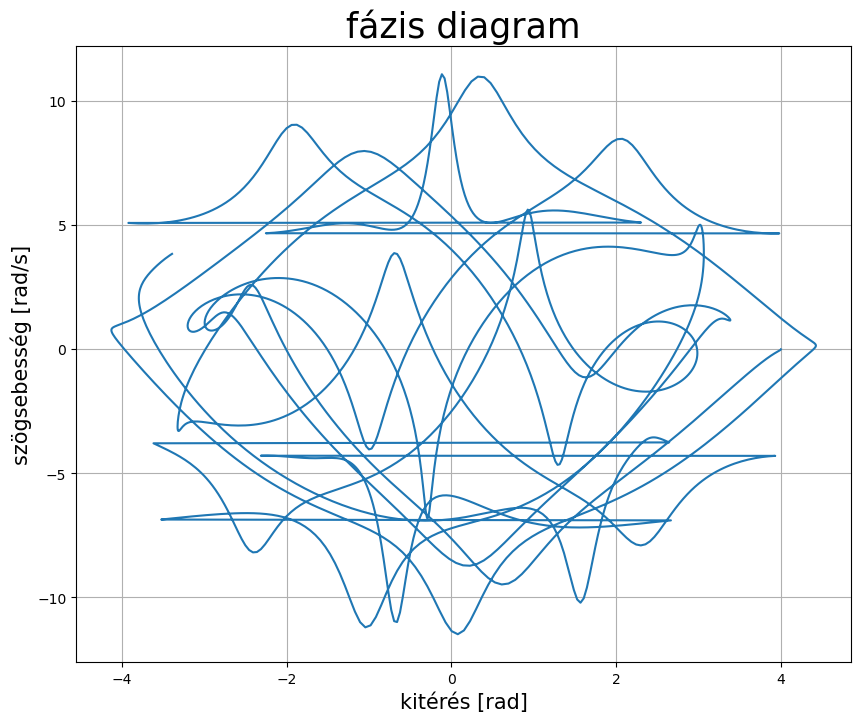

In [64]:
phase(theta1_double,omega1_double,theta2_double,omega2_double)

In [65]:
t_double,theta1_double,omega1_double, theta2_double, omega2_double = read_data5('data3/double_pendulum_simulation4.data')


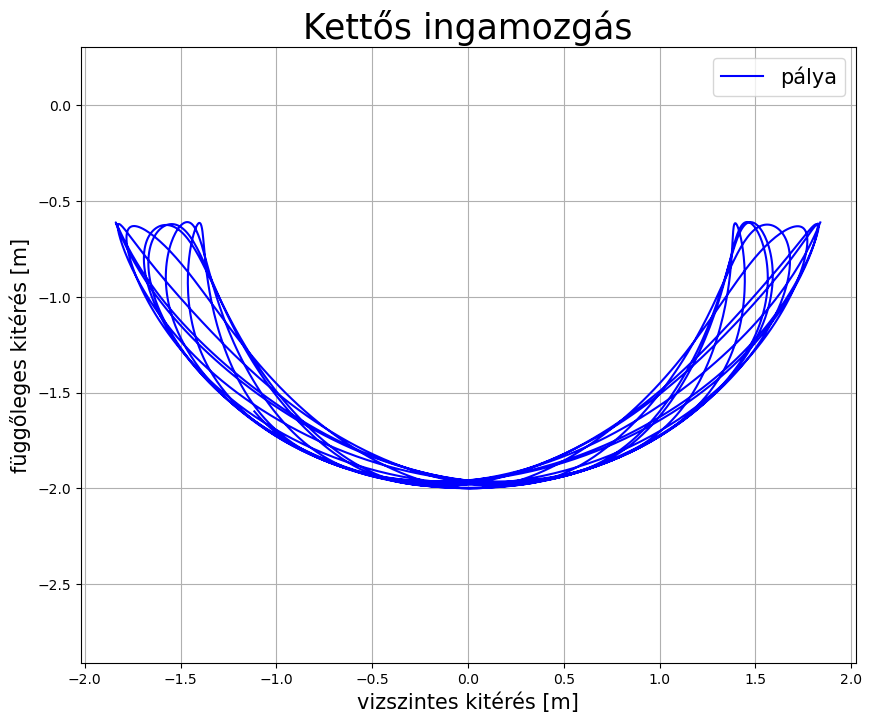

In [66]:
plot_double_pendulum(theta1_double,1,theta2_double,1)

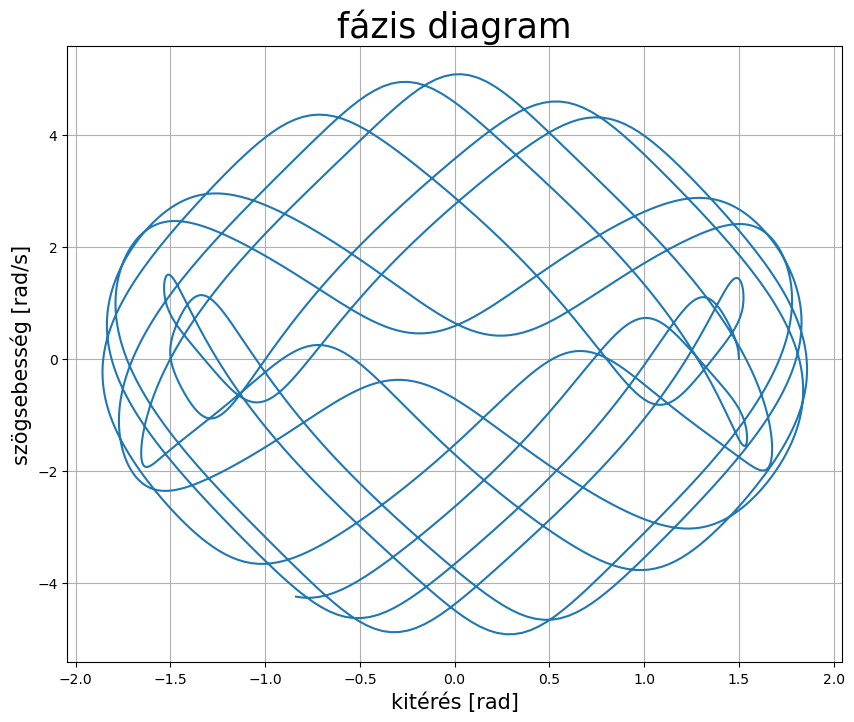

In [67]:
phase(theta1_double,omega1_double,theta2_double,omega2_double)

In [68]:
t_double,theta1_double,omega1_double, theta2_double, omega2_double = read_data5('data3/double_pendulum_simulation5.data')


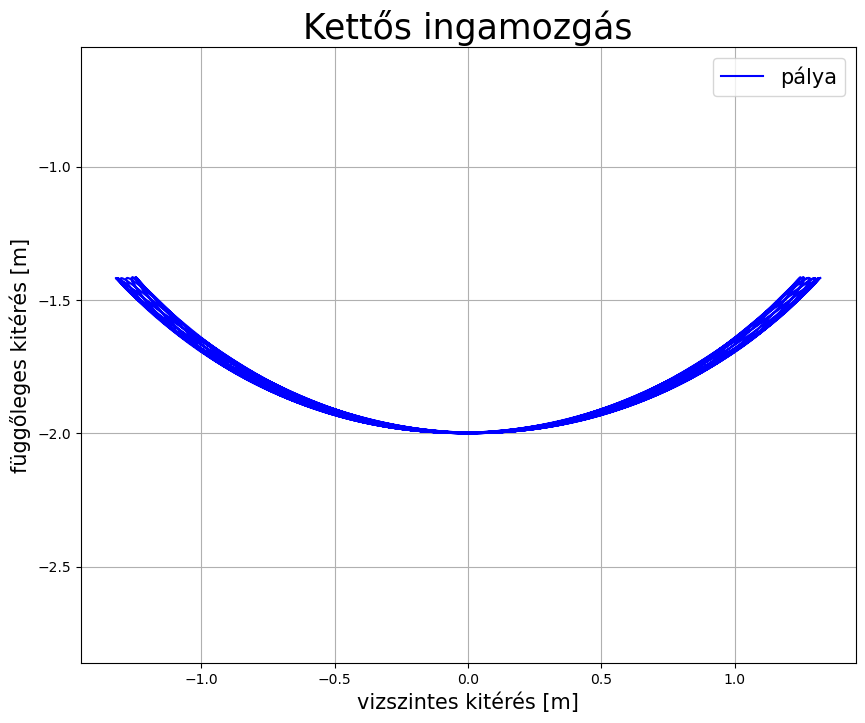

In [69]:
plot_double_pendulum(theta1_double,1,theta2_double,1)

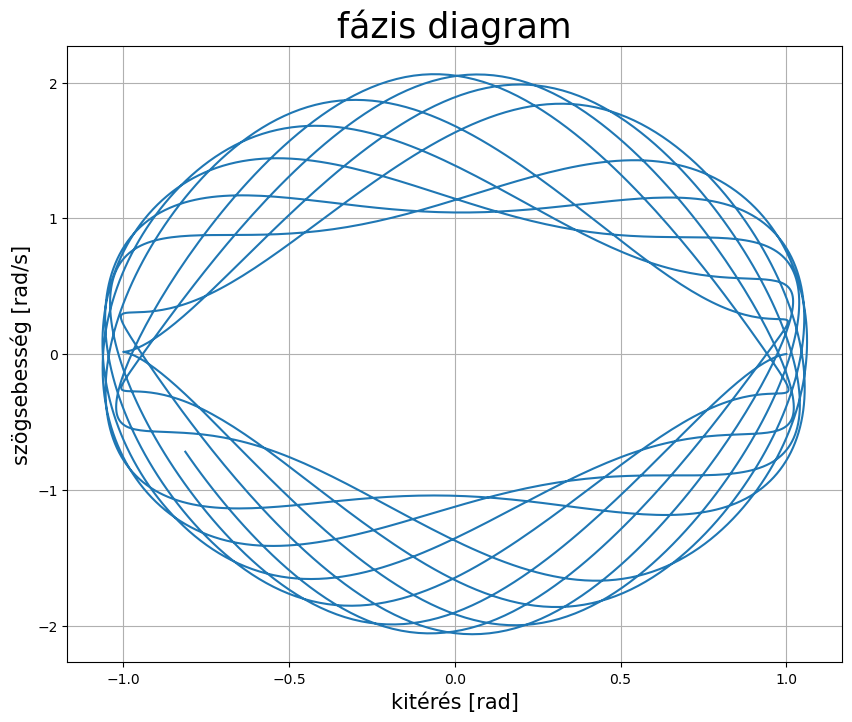

In [70]:
phase(theta1_double,omega1_double,theta2_double,omega2_double)